<a href="https://colab.research.google.com/github/o-sapohova/Exploratory-data-analysis-of-company-operations/blob/main/Exploratory_data_analysis_of_company_operations_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data overview**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Python_for_Data_Analitytics/files/Final_project/

Mounted at /content/drive
/content/drive/MyDrive/Python_for_Data_Analitytics/files/Final_project


In [ ]:
# Import CSV files
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")
countries = pd.read_csv("countries.csv")

products.head()

id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

In [ ]:
countries.head()

name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

In [ ]:
events.head()

Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79

In [ ]:
print(f'Таблиця products містить записів: {products.shape[0]}, колонок: {products.shape[1]}')
print(f'Таблиця countries містить записів: {countries.shape[0]}, колонок: {countries.shape[1]}')
print(f'Таблиця events містить записів: {events.shape[0]}, колонок: {events.shape[1]}')

Таблиця products містить записів: 12, колонок: 2
Таблиця countries містить записів: 249, колонок: 5
Таблиця events містить записів: 1330, колонок: 10


## **Опис колонок:**
- ***products:***
  * id - ідентифікатор продукту;
  * item_type -  продукт.
- ***countries:***
  * name - назва країни;
  * alpha-2 - код країни (2 символи);
  * alpha-3 - код країни (3 символи);
  * region - регіон;
  * sub-region - субрегіон.
- ***events:***
  * Order ID - ідентифікатор замовлення;
  * Order Date - дата замовлення;
  * Ship Date - дата відправлення замовлення;
  * Order Priority - пріоритет замовлення (L - Low, M - Medium, H - High, C - Critical);
  * Country Code - код країни (3 символи);
  * Product ID - ідентифікатор продукту;
  * Sales Channel - канал продажу (Online, Offline);
  * Units Sold - кількість одиниць товару, що були продані в межах одного замовлення;
  * Unit Price - вартість однієї одиниці товару;
  * Unit Cost - витрати на одну одиницю товару.

## **Ключові поля, що поєднують таблиці:**
  - таблиці ***events*** та ***products*** поєднуються за допомогою events["Product ID"] та products["id"];
  - таблиці ***events*** та ***countries*** поєднуються за допомогою events["Country Code"] та countries["alpha-3"].

# **Data cleaning**

In [ ]:
# Number of missing values
print('==products==')
print(products.isna().sum())
print('\n==countries==')
print(countries.isna().sum())
print('\n==events==')
print(events.isna().sum())


==products==
id           0
item_type    0
dtype: int64

==countries==
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

==events==
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
# Proportion of missing values ​​in the total
print('\n==countries==')
print(countries.isna().sum() / countries.shape[0] * 100)
print('\n==events==')
print(events.isna().sum() / events.shape[0] * 100)


==countries==
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64

==events==
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
# Print rows with NaN values in countries
missing_rows = countries[countries.isnull().any(axis=1)]
print(missing_rows)

           name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Africa


In [ ]:
# Search rows with Country Code = "ATA" in events
antarctica_rows= events[events["Country Code"] == "ATA"]
print(antarctica_rows)

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []


In [ ]:
# Deleting rows with NaN values in column "Units Sold " in events
events = events.dropna(subset=["Units Sold"])
print(events.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         0
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
# Data type checking
print('==products==')
print(products.dtypes)
print('\n==countries==')
print(countries.dtypes)
print('\n==events==')
print(events.dtypes)

==products==
id            int64
item_type    object
dtype: object

==countries==
name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object

==events==
Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object


In [ ]:
# Convert the date column to datetime
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])
print(events.dtypes)

Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object


In [ ]:
# Checking for duplicates in data
duplicate_rows_products = products.duplicated()
print(f'Кількість дублікатів в products: {duplicate_rows_products.sum()}')
duplicate_rows_countries = countries.duplicated()
print(f'Кількість дублікатів в countries: {duplicate_rows_countries.sum()}')

for col in events.columns:
    if events[col].dtype == "object":
        events[col] = events[col].str.strip()
        events[col] = events[col].replace({"А": "A", "О": "O", "І": "I", "С": "C", "а": "a", "о": "o", "і": "i", "с": "c"})
events["Order Priority"] = events["Order Priority"].str.upper()
events["Country Code"] = events["Country Code"].str.upper()
events["Sales Channel"] = events["Sales Channel"].str.title()

duplicate_rows_events = events.duplicated()
print(f'Кількість дублікатів в events: {duplicate_rows_events.sum()}')

Кількість дублікатів в products: 0
Кількість дублікатів в countries: 0
Кількість дублікатів в events: 0


In [ ]:
# Checking for anomalous values
events.describe()

Order ID                     Order Date  \
count  1.328000e+03                           1328   
mean   5.416231e+08  2013-10-11 22:28:54.939759104   
min    1.006406e+08            2010-01-01 00:00:00   
25%    3.213291e+08            2011-12-14 06:00:00   
50%    5.399925e+08            2013-10-15 12:00:00   
75%    7.547357e+08            2015-08-29 12:00:00   
max    9.998797e+08            2017-07-23 00:00:00   
std    2.573496e+08                            NaN   

                           Ship Date   Product ID   Units Sold   Unit Price  \
count                           1328  1328.000000  1328.000000  1328.000000   
mean   2013-11-05 17:22:02.891566336  5787.775602  4952.201807   264.913245   
min              2010-01-10 00:00:00  1270.000000     2.000000     9.330000   
25%              2012-01-02 00:00:00  3127.000000  2356.750000    81.730000   
50%              2013-11-05 12:00:00  5988.000000  4962.000000   154.060000   
75%              2015-10-04 18:00:00  8681.000000  7459.500000   437.200000   
max              2017-08-31 00:00:00  8969.000000  9999.000000   668.270000   
std                              NaN  2820.635702  2905.198996   217.386320   

         Unit Cost  
count  1328.000000  
mean    187.211521  
min       6.920000  
25%      35.840000  
50%      97.440000  
75%     263.330000  
max     524.960000  
std     176.187801

## **Пропущені значення:**
- ***products:***  відсутні;
- ***countries:***
  * у колонці *alpha-2* відсутнє 1 значення - не впливає на аналіз даних, оскільки колонка не використовується у основній таблиці events;
  *  у колонках *region* та *sub-region* відсутнє 1 значення -  не впливає на аналіз даних, оскільки відсутнє значення для країни Антарктика, яка відсутня у основній таблиці events.
- ***events:***
  * у колонці *Units Sold* відсутні 2 значення, що складає 0.15% від загальної кількості, були видалені, оскільки відсутність кількості товару впливає на аналіз;
  * у колонці *Country Code* відсутні 82 значення, що складає 6.17% від загальної кількості, були не враховані при розрахунку по країнам та регіонам, але були враховані у розрахунках загальних та в розрізі інших метрик.


## **Типи даних:**
- ***events:***
  * у колонках *Order Date* та *Ship Date* тип даних було змінено на datetime.


## **Наявність дублікатів:**
відсутні.


## **Наявність аномальних значень:**
дивних чи аномальних значень не помічено.

# **Data analysis and visualization**

In [ ]:
# Joining DataFrames
data=pd.merge(events, products, left_on="Product ID", right_on="id", how="left")
data=pd.merge(data, countries, left_on="Country Code", right_on="alpha-3", how="left")
data.head()

Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M          NaN        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost    id  item_type  \
0        Online       650.0      205.70     117.11  2103     Cereal   
1       Offline      1993.0      205.70     117.11  2103     Cereal   
2        Online      4693.0      668.27     502.54  7940  Household   
3        Online      1171.0      109.28      35.84  2455    Clothes   
4       Offline      7648.0       47.45      31.79  1270  Beverages   

         name alpha-2 alpha-3  region       sub-region  
0      Norway      NO     NOR  Europe  Northern Europe  
1      Serbia      RS     SRB  Europe  Southern Europe  
2         NaN     NaN     NaN     NaN              NaN  
3  Montenegro      ME     MNE  Europe  Southern Europe  
4      Serbia      RS     SRB  Europe  Southern Europe

In [ ]:
# Removing columns
data = data.drop(columns=["id", "alpha-2", "alpha-3", "Country Code"])
data.head()

Order ID Order Date  Ship Date Order Priority  Product ID Sales Channel  \
0  100640618 2014-10-08 2014-10-18              M        2103        Online   
1  100983083 2016-08-11 2016-08-11              C        2103       Offline   
2  101025998 2014-07-18 2014-08-11              M        7940        Online   
3  102230632 2017-05-13 2017-06-13              L        2455        Online   
4  103435266 2012-08-11 2012-09-18              H        1270       Offline   

   Units Sold  Unit Price  Unit Cost  item_type        name  region  \
0       650.0      205.70     117.11     Cereal      Norway  Europe   
1      1993.0      205.70     117.11     Cereal      Serbia  Europe   
2      4693.0      668.27     502.54  Household         NaN     NaN   
3      1171.0      109.28      35.84    Clothes  Montenegro  Europe   
4      7648.0       47.45      31.79  Beverages      Serbia  Europe   

        sub-region  
0  Northern Europe  
1  Southern Europe  
2              NaN  
3  Southern Europe  
4  Southern Europe

In [ ]:
# Renaming columns
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.rename(columns={"name": "country", "item_type": "category"}, inplace=True)
data.head()

order_id order_date  ship_date order_priority  product_id sales_channel  \
0  100640618 2014-10-08 2014-10-18              M        2103        Online   
1  100983083 2016-08-11 2016-08-11              C        2103       Offline   
2  101025998 2014-07-18 2014-08-11              M        7940        Online   
3  102230632 2017-05-13 2017-06-13              L        2455        Online   
4  103435266 2012-08-11 2012-09-18              H        1270       Offline   

   units_sold  unit_price  unit_cost   category     country  region  \
0       650.0      205.70     117.11     Cereal      Norway  Europe   
1      1993.0      205.70     117.11     Cereal      Serbia  Europe   
2      4693.0      668.27     502.54  Household         NaN     NaN   
3      1171.0      109.28      35.84    Clothes  Montenegro  Europe   
4      7648.0       47.45      31.79  Beverages      Serbia  Europe   

        sub-region  
0  Northern Europe  
1  Southern Europe  
2              NaN  
3  Southern Europe  
4  Southern Europe

## **Ключові метрики діяльності компанії**

In [ ]:
# Calculation of metrics
print(f'Total number of orders: {data.shape[0]}.')
print(f'Total units sold: {data["units_sold"].sum():,.0f}.')
data["revenue"] = data["units_sold"] * data["unit_price"]
print(f'Total revenue: ${data["revenue"].sum():,.2f}.')
data["cost"] = data["units_sold"] * data["unit_cost"]
print(f'Total cost: ${data["cost"].sum():,.2f}.')
data["profit"] = data["revenue"] - data["cost"]
print(f'Total profit: ${data["profit"].sum():,.2f}.')
print(f'Max unit price: {data["unit_price"].max()}.')
print(f'Min unit price: {data["unit_price"].min()}.')
print(f'Total number of countries covered: {data["country"].nunique()}.')
data["order_processing_time"] = data["ship_date"] - data["order_date"]
print(f'Median order processing time: {data["order_processing_time"].median().days} days.')

Total number of orders: 1328.
Total units sold: 6,576,524.
Total revenue: $1,702,129,408.21.
Total cost: $1,200,694,949.21.
Total profit: $501,434,459.00.
Max unit price: 668.27.
Min unit price: 9.33.
Total number of countries covered: 45.
Median order processing time: 25 days.


In [ ]:
data.head()

order_id order_date  ship_date order_priority  product_id sales_channel  \
0  100640618 2014-10-08 2014-10-18              M        2103        Online   
1  100983083 2016-08-11 2016-08-11              C        2103       Offline   
2  101025998 2014-07-18 2014-08-11              M        7940        Online   
3  102230632 2017-05-13 2017-06-13              L        2455        Online   
4  103435266 2012-08-11 2012-09-18              H        1270       Offline   

   units_sold  unit_price  unit_cost   category     country  region  \
0       650.0      205.70     117.11     Cereal      Norway  Europe   
1      1993.0      205.70     117.11     Cereal      Serbia  Europe   
2      4693.0      668.27     502.54  Household         NaN     NaN   
3      1171.0      109.28      35.84    Clothes  Montenegro  Europe   
4      7648.0       47.45      31.79  Beverages      Serbia  Europe   

        sub-region     revenue        cost     profit order_processing_time  
0  Northern Europe   133705.00    76121.50   57583.50               10 days  
1  Southern Europe   409960.10   233400.23  176559.87                0 days  
2              NaN  3136191.11  2358420.22  777770.89               24 days  
3  Southern Europe   127966.88    41968.64   85998.24               31 days  
4  Southern Europe   362897.60   243129.92  119767.68               38 days

## **Продажі в розрізі категорій товарів**

In [ ]:
# Sales by category
sales_by_category = data.groupby(["category"])[["profit", "revenue", "cost", "units_sold"]].sum().reset_index().sort_values(by="profit", ascending=False)
print(sales_by_category)


           category       profit       revenue          cost  units_sold
4         Cosmetics  92723306.17  2.331548e+08  1.404315e+08    533291.0
8   Office Supplies  77977176.25  4.022140e+08  3.242368e+08    617641.0
6         Household  72962466.77  2.942052e+08  2.212427e+08    440249.0
0         Baby Food  53940997.16  1.436476e+08  8.970659e+07    562706.0
3           Clothes  43431314.40  6.462655e+07  2.119524e+07    591385.0
2            Cereal  41255034.15  9.579140e+07  5.453637e+07    465685.0
11       Vegetables  36776002.72  8.974673e+07  5.297073e+07    582544.0
7              Meat  30337736.00  2.237620e+08  1.934243e+08    530380.0
10           Snacks  27027422.40  7.478861e+07  4.776119e+07    490160.0
9     Personal Care  13975410.68  4.557902e+07  3.160361e+07    557678.0
1         Beverages   9601662.78  2.909316e+07  1.949150e+07    613133.0
5            Fruits   1425929.52  5.520300e+06  4.094370e+06    591672.0


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0, 0].barh(sales_by_category["category"], sales_by_category["profit"])
ax[0, 0].set_title("Profit by Category", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel("Profit ($)")
ax[0, 0].set_ylabel("Category")
ax[0, 0].invert_yaxis()
ax[0, 0].ticklabel_format(style='plain', axis='x')

ax[0, 1].barh(sales_by_category["category"], sales_by_category["revenue"])
ax[0, 1].set_title("Revenue by Category", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel("Revenue ($)")
ax[0, 1].set_ylabel("Category")
ax[0, 1].invert_yaxis()
ax[0, 1].ticklabel_format(style='plain', axis='x')

ax[1, 0].barh(sales_by_category["category"], sales_by_category["cost"])
ax[1, 0].set_title("Cost by Category", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel("Cost ($)")
ax[1, 0].set_ylabel("Category")
ax[1, 0].invert_yaxis()
ax[1, 0].ticklabel_format(style='plain', axis='x')

ax[1, 1].barh(sales_by_category["category"], sales_by_category["units_sold"])
ax[1, 1].set_title("Units Sold by Category", fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel("Units Sold")
ax[1, 1].set_ylabel("Category")
ax[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# Profit, revenue and cost by category
metrics = ["profit", "revenue", "cost"]

plt.figure(figsize=(12, 6))

colors = {"profit": "green", "revenue": "blue", "cost": "red"}

for metric in metrics:
    plt.plot(sales_by_category["category"], sales_by_category[metric], marker='o', linestyle='-', label=metric, color=colors.get(metric))

plt.title("Profit, Revenue and Cost by Category", fontsize=14, fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Amount ($)")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha="right")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

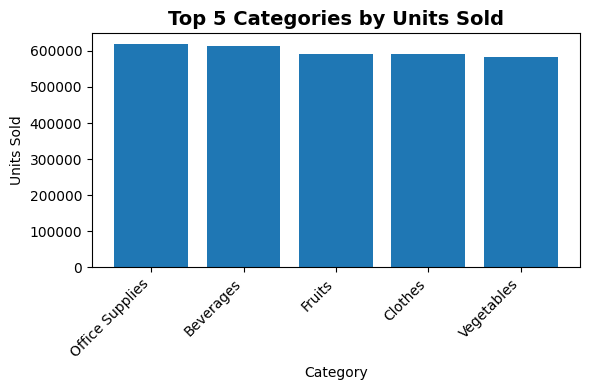

In [ ]:
# Top 5 categories by units sold
top_5_categories = data.groupby(["category"])["units_sold"].sum().nlargest(5)

plt.figure(figsize=(6, 4))
plt.bar(top_5_categories.index, top_5_categories.values)
plt.title("Top 5 Categories by Units Sold", fontsize=14, fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **Продажі в розрізі георгафії**

In [ ]:
# Sales by country
sales_by_country = data.groupby(["country"])[["profit", "revenue", "cost", "units_sold"]].sum().sort_values(by="profit", ascending=False)
print(sales_by_country)

                             profit      revenue         cost  units_sold
country                                                                  
Andorra                 15410036.63  47756693.17  32346656.54    185686.0
Ukraine                 14804925.74  53252317.54  38447391.80    164577.0
Malta                   14610127.88  47145320.81  32535192.93    173641.0
San Marino              13792992.81  47883708.48  34090715.67    192228.0
Hungary                 13786231.03  42408249.12  28622018.09    152242.0
Macedonia               13684099.95  49222085.25  35537985.30    203078.0
Czech Republic          13635593.78  53543932.14  39908338.36    142446.0
Russia                  13267682.64  46051659.81  32783977.17    165954.0
Bosnia and Herzegovina  13257602.77  50117508.49  36859905.72    153545.0
Greece                  12324450.13  38699541.70  26375091.57    176859.0
Slovenia                12123524.52  38892531.27  26769006.75    156479.0
Slovakia                12052790.03  4

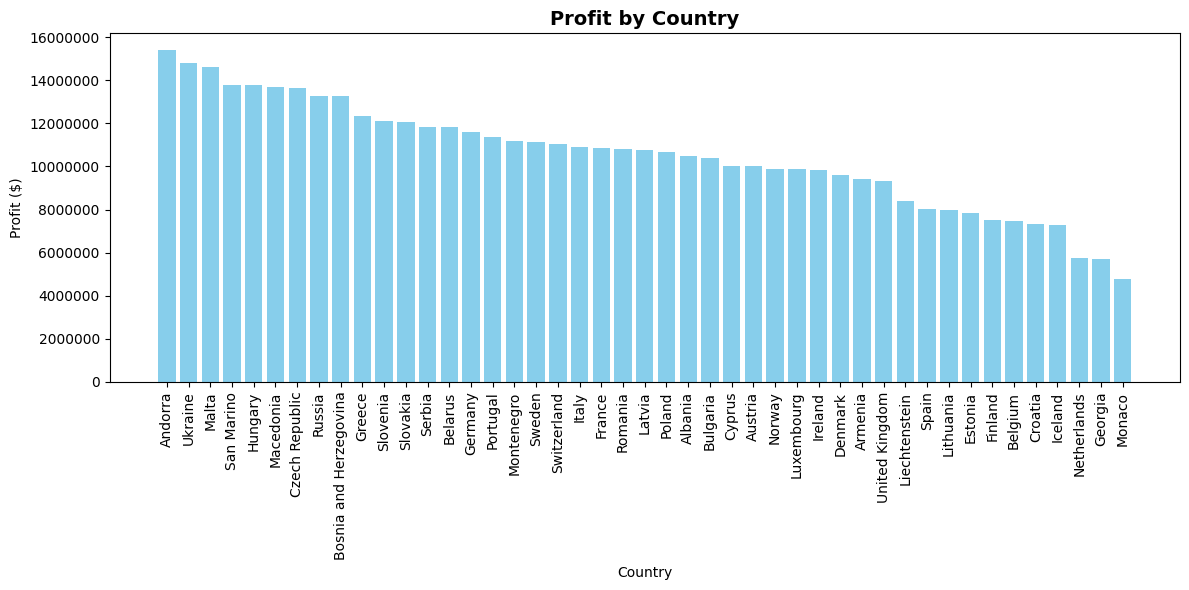

In [ ]:
# Profit by country
plt.figure(figsize=(12, 6))

plt.bar(sales_by_country.index, sales_by_country["profit"], color="skyblue")
plt.title("Profit by Country", fontsize=14, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Profit ($)")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Top 10 countries by profit, revenue, cost and units sold
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

top_10_profit = data.groupby(["country"])["profit"].sum().nlargest(10)
ax[0, 0].barh(top_10_profit.index, top_10_profit.values)
ax[0, 0].set_title("Top 10 Countries by Profit", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel("Profit ($)")
ax[0, 0].set_ylabel("Country")
ax[0, 0].invert_yaxis()
ax[0, 0].ticklabel_format(style='plain', axis='x')

top_10_revenue = data.groupby(["country"])["revenue"].sum().nlargest(10)
ax[0, 1].barh(top_10_revenue.index, top_10_revenue.values)
ax[0, 1].set_title("Top 10 Countries by Revenue", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel("Revenue ($)")
ax[0, 1].set_ylabel("Country")
ax[0, 1].invert_yaxis()
ax[0, 1].ticklabel_format(style='plain', axis='x')

top_10_cost = data.groupby(["country"])["cost"].sum().nlargest(10)
ax[1, 0].barh(top_10_cost.index, top_10_cost.values)
ax[1, 0].set_title("Top 10 Countries by Cost", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel("Cost ($)")
ax[1, 0].set_ylabel("Country")
ax[1, 0].invert_yaxis()
ax[1, 0].ticklabel_format(style='plain', axis='x')

top_10_units_sold = data.groupby(["country"])["units_sold"].sum().nlargest(10)
ax[1, 1].barh(top_10_units_sold.index, top_10_units_sold.values)
ax[1, 1].set_title("Top 10 Countries by Units Sold", fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel("Units Sold")
ax[1, 1].set_ylabel("Country")
ax[1, 1].invert_yaxis()
ax[1, 1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

In [ ]:
# Category with max units sold and max profit by country
data_grouped = data.groupby(["country", "category"]).agg({"units_sold": "sum", "profit": "sum"})

category_with_max_units = data_grouped.groupby("country")["units_sold"].idxmax()
max_units_sold = data_grouped.loc[category_with_max_units, "units_sold"]

category_with_max_profit = data_grouped.groupby("country")["profit"].idxmax()
max_profit = data_grouped.loc[category_with_max_profit, "profit"]

result = pd.DataFrame({
    "max_units_category": [cat for country, cat in category_with_max_units],
    "max_units": max_units_sold.values,
    "max_profit_category": [cat for country, cat in category_with_max_profit],
    "max_profit": max_profit.values
}, index=category_with_max_units.index)

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

print(result)

                       max_units_category  max_units max_profit_category  max_profit
country                                                                             
Albania                         Cosmetics    25412.0           Cosmetics  4418384.44
Andorra                         Beverages    29262.0           Cosmetics  4198091.15
Armenia                              Meat    29950.0           Household  2039804.84
Austria                   Office Supplies    24657.0     Office Supplies  3112946.25
Belarus                         Beverages    33173.0           Cosmetics  2934751.73
Belgium                            Fruits    26334.0     Office Supplies  1828857.50
Bosnia and Herzegovina         Vegetables    24590.0           Household  3236043.98
Bulgaria                           Fruits    25403.0     Office Supplies  2323631.25
Croatia                         Household    16300.0           Household  2701399.00
Cyprus                            Clothes    31672.0           Ho

In [ ]:
result_sorted = result.sort_index(ascending=False)
fig, ax = plt.subplots(1, 2, figsize=(16, 12))

bars_profit = ax[0].barh(result_sorted.index, result_sorted["max_profit"], color='lightcoral')
ax[0].set_title("Category with MAX Profit by Country", fontsize=14, fontweight='bold')
ax[0].set_xlabel("MAX Profit ($)")
ax[0].set_ylabel("Country")
ax[0].tick_params(axis='y', labelsize=8)
ax[0].ticklabel_format(style='plain', axis='x')

distance_from_bottom_profit = 0.05 * result_sorted["max_profit"].max()
for bar, category in zip(bars_profit, result_sorted["max_profit_category"]):
    ax[0].annotate(category, xy=(distance_from_bottom_profit, bar.get_y() + bar.get_height()/2),
                   va='center', fontsize=8, color='black')

bars_units = ax[1].barh(result_sorted.index, result_sorted["max_units"], color='skyblue')
ax[1].set_title("Category with MAX Units Sold by Country", fontsize=14, fontweight='bold')
ax[1].set_xlabel("MAX Units Sold")
ax[1].set_ylabel("Country")
ax[1].tick_params(axis='y', labelsize=8)
ax[1].ticklabel_format(style='plain', axis='x')

distance_from_bottom_units = 0.05 * result_sorted["max_units"].max()
for bar, category in zip(bars_units, result_sorted["max_units_category"]):
    ax[1].annotate(category, xy=(distance_from_bottom_units, bar.get_y() + bar.get_height()/2),
                   va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

In [ ]:
# Sales by region
sales_by_region = data.groupby(["region"])[["profit", "revenue", "cost", "units_sold"]].sum().sort_values(by="profit", ascending=False)
print(sales_by_region)

              profit       revenue          cost  units_sold
region                                                      
Europe  4.485568e+08  1.505653e+09  1.057096e+09   5761244.0
Asia    2.515225e+07  9.333089e+07  6.817863e+07    410427.0


In [ ]:
# Sales by sub-region
sales_by_sub_region = data.groupby(["sub-region"])[["profit", "revenue", "cost", "units_sold"]].sum().sort_values(by="profit", ascending=False)
print(sales_by_sub_region)

                       profit       revenue          cost  units_sold
sub-region                                                           
Southern Europe  1.662964e+08  5.620323e+08  3.957358e+08   2126353.0
Eastern Europe   1.112726e+08  3.786865e+08  2.674139e+08   1349811.0
Northern Europe  9.119385e+07  2.964108e+08  2.052169e+08   1244958.0
Western Europe   7.979385e+07  2.685233e+08  1.887294e+08   1040122.0
Western Asia     2.515225e+07  9.333089e+07  6.817863e+07    410427.0


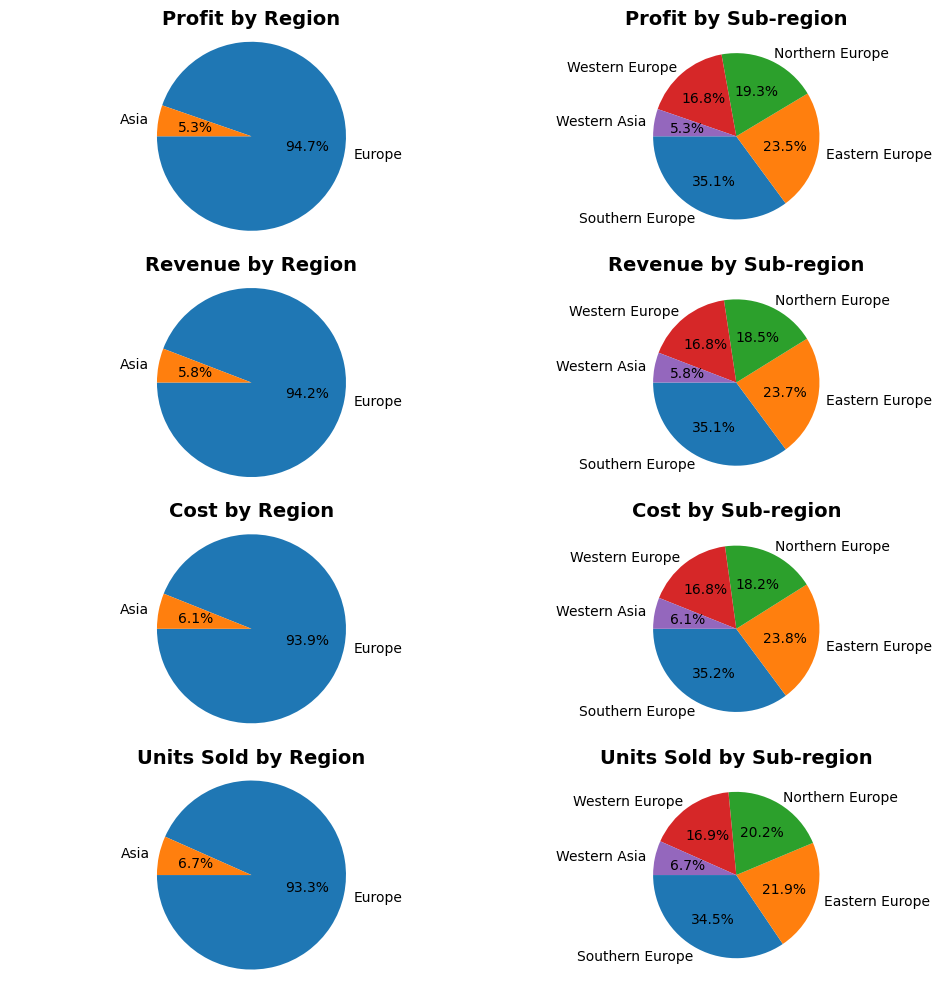

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10))

regions = sales_by_region.index
profit_by_region = sales_by_region["profit"]
revenue_by_region = sales_by_region["revenue"]
cost_by_region = sales_by_region["cost"]
units_by_region = sales_by_region["units_sold"]

sub_regions = sales_by_sub_region.index
profit_by_sub_region = sales_by_sub_region["profit"]
revenue_by_sub_region = sales_by_sub_region["revenue"]
cost_by_sub_region = sales_by_sub_region["cost"]
units_by_sub_region = sales_by_sub_region["units_sold"]

ax[0, 0].pie(profit_by_region, labels=regions, autopct='%1.1f%%', startangle=180)
ax[0, 0].set_title("Profit by Region", fontsize=14, fontweight='bold')
ax[0, 0].axis('equal')

ax[1, 0].pie(revenue_by_region, labels=regions, autopct='%1.1f%%', startangle=180)
ax[1, 0].set_title("Revenue by Region", fontsize=14, fontweight='bold')
ax[1, 0].axis('equal')

ax[2, 0].pie(cost_by_region, labels=regions, autopct='%1.1f%%', startangle=180)
ax[2, 0].set_title("Cost by Region", fontsize=14, fontweight='bold')
ax[2, 0].axis('equal')

ax[3, 0].pie(units_by_region, labels=regions, autopct='%1.1f%%', startangle=180)
ax[3, 0].set_title("Units Sold by Region", fontsize=14, fontweight='bold')
ax[3, 0].axis('equal')

ax[0, 1].pie(profit_by_sub_region, labels=sub_regions, autopct='%1.1f%%', startangle=180)
ax[0, 1].set_title("Profit by Sub-region", fontsize=14, fontweight='bold')

ax[1, 1].pie(revenue_by_sub_region, labels=sub_regions, autopct='%1.1f%%', startangle=180)
ax[1, 1].set_title("Revenue by Sub-region", fontsize=14, fontweight='bold')

ax[2, 1].pie(cost_by_sub_region, labels=sub_regions, autopct='%1.1f%%', startangle=180)
ax[2, 1].set_title("Cost by Sub-region", fontsize=14, fontweight='bold')

ax[3, 1].pie(units_by_sub_region, labels=sub_regions, autopct='%1.1f%%', startangle=180)
ax[3, 1].set_title("Units Sold by Sub-region", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## **Продажі в розрізі каналів продажу**

In [ ]:
# Sales by sales channel
sales_by_channel = data.groupby(["sales_channel"])[["profit", "revenue", "cost", "units_sold"]].sum().sort_values(by="profit", ascending=False)
sales_by_channel["orders"] = data.groupby("sales_channel").size()
print(sales_by_channel)

                     profit       revenue          cost  units_sold  orders
sales_channel                                                              
Offline        2.534665e+08  8.717606e+08  6.182941e+08   3320363.0     665
Online         2.479679e+08  8.303688e+08  5.824008e+08   3256161.0     663


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))

channels = sales_by_channel.index
profit_by_channel = sales_by_channel["profit"]
orders_by_channel = sales_by_channel["orders"]

ax[0].pie(profit_by_channel, labels=channels, autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})
ax[0].set_title("Profit by Sales Channel", fontsize=14, fontweight='bold')

bars = ax[1].bar(channels, orders_by_channel)
ax[1].set_title("Orders by Sales Channel", fontsize=14, fontweight='bold')
ax[1].set_xticks(range(len(channels)))
ax[1].set_xticklabels(channels, fontweight='bold')
ax[1].set_yticklabels([])
ax[1].tick_params(axis='y', left=False)
ax[1].spines[['top', 'right', 'left', 'bottom']].set_visible(False)

for bar in bars:
  ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 100, f'{bar.get_height()}',
             ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# Sales by category and sales channel
sales_by_category_and_channel = data.groupby(["category", "sales_channel"])[["profit", "revenue", "cost", "units_sold"]].sum()
sales_by_category_and_channel["orders"] = data.groupby(["category", "sales_channel"]).size()
print(sales_by_category_and_channel.unstack())

                      profit                    revenue                        cost               units_sold            orders       
sales_channel        Offline       Online       Offline        Online       Offline        Online    Offline    Online Offline Online
category                                                                                                                             
Baby Food        32106102.22  21834894.94  8.550016e+07  5.814742e+07  5.339406e+07  3.631253e+07   334927.0  227779.0      65     47
Beverages         4570151.76   5031511.02  1.384762e+07  1.524554e+07  9.277466e+06  1.021403e+07   291836.0  321297.0      57     64
Cereal           18721370.34  22533663.81  4.346976e+07  5.232165e+07  2.474839e+07  2.978798e+07   211326.0  254359.0      47     56
Clothes          21913247.52  21518066.88  3.260729e+07  3.201926e+07  1.069405e+07  1.050119e+07   298383.0  293002.0      50     55
Cosmetics        44545146.26  48178159.91  1.120098e+08  1.211

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    x="profit",
    y="category",
    hue="sales_channel",
    data=data.groupby(["category", "sales_channel"], observed=False)["profit"].sum().reset_index(),
    ax=ax[0]
)
ax[0].set_title("Profit by Category and Sales Channel", fontsize=14, fontweight='bold')
ax[0].set_xlabel("Profit ($)")
ax[0].set_ylabel("Category")
ax[0].ticklabel_format(style='plain', axis='x')

sns.barplot(
    x="orders",
    y="category",
    hue="sales_channel",
    data=data.groupby(["category", "sales_channel"], observed=False).size().reset_index(name="orders"),
    ax=ax[1]
)
ax[1].set_title("Orders by Category and Sales Channel", fontsize=14, fontweight='bold')
ax[1].set_xlabel("Orders")
ax[1].set_ylabel("Category")
ax[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

In [ ]:
# Sales by country and sales channel
sales_by_country_and_channel = data.groupby(["country", "sales_channel"])[["profit", "revenue", "cost", "units_sold"]].sum()
sales_by_country_and_channel["orders"] = data.groupby(["country", "sales_channel"]).size()
print(sales_by_country_and_channel.unstack())

                            profit                   revenue                      cost              units_sold            orders       
sales_channel              Offline       Online      Offline       Online      Offline       Online    Offline    Online Offline Online
country                                                                                                                                
Albania                 6758928.20   3731777.82  18124991.66  14099862.21  11366063.46  10368084.39    53889.0   36719.0      11     10
Andorra                 4484291.87  10925744.76  14338994.45  33417698.72   9854702.58  22491953.96    75048.0  110638.0      18     22
Armenia                 6171705.75   3250647.43  26596536.37  10923303.84  20424830.62   7672656.41    82840.0   67825.0      16     13
Austria                 6059202.91   3968306.73  20529704.59  15211166.90  14470501.68  11242860.17    90296.0   55277.0      15     13
Belarus                 7038870.82   4813550.23 

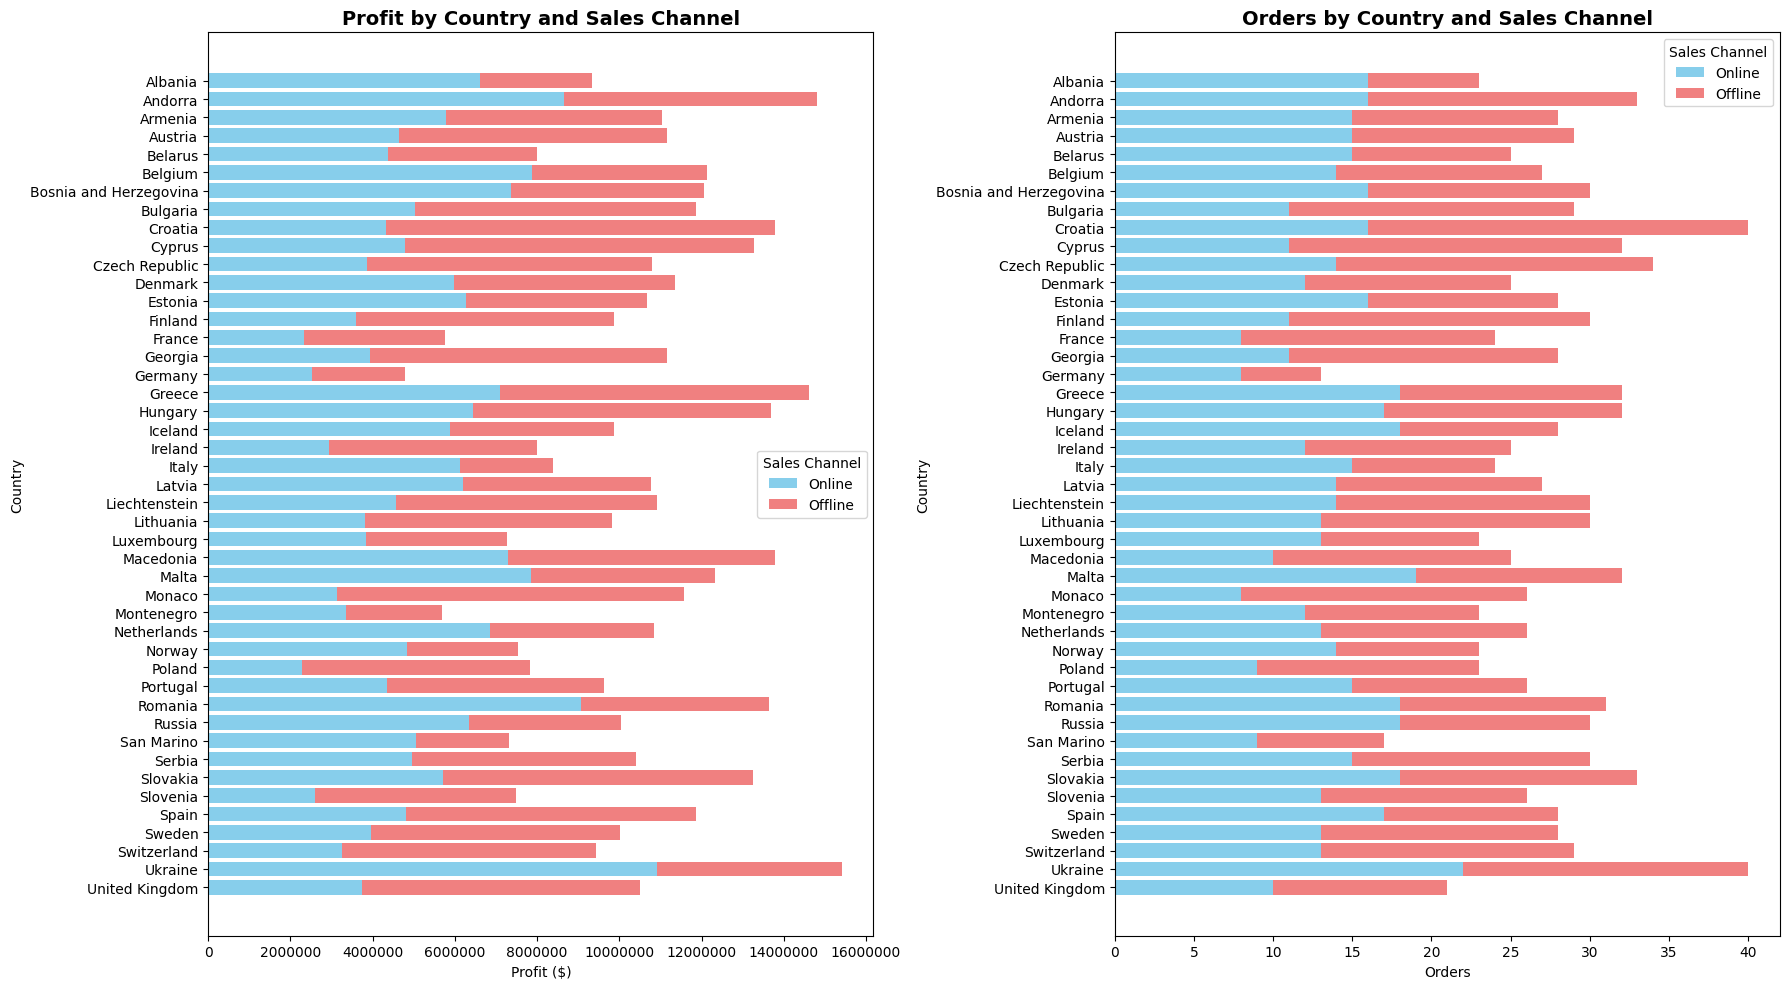

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

countries = sales_by_country_and_channel.index.get_level_values("country").unique().sort_values(ascending=False)
online_profit_by_country = sales_by_country_and_channel.unstack()["profit"]["Online"]
offline_profit_by_country = sales_by_country_and_channel.unstack()["profit"]["Offline"]
online_orders_by_country = sales_by_country_and_channel.unstack()["orders"]["Online"]
offline_orders_by_country = sales_by_country_and_channel.unstack()["orders"]["Offline"]

ax[0].barh(countries, online_profit_by_country, label="Online", color='skyblue')
ax[0].barh(countries, offline_profit_by_country, left=online_profit_by_country, label="Offline", color='lightcoral')
ax[0].set_title("Profit by Country and Sales Channel", fontsize=14, fontweight='bold')
ax[0].set_xlabel("Profit ($)")
ax[0].set_ylabel("Country")
ax[0].legend(title="Sales Channel")
ax[0].ticklabel_format(style='plain', axis='x')

ax[1].barh(countries, online_orders_by_country, label="Online", color='skyblue')
ax[1].barh(countries, offline_orders_by_country, left=online_orders_by_country, label="Offline", color='lightcoral')
ax[1].set_title("Orders by Country and Sales Channel", fontsize=14, fontweight='bold')
ax[1].set_xlabel("Orders")
ax[1].set_ylabel("Country")
ax[1].legend(title="Sales Channel")

plt.tight_layout()
plt.show()

## **Час обробки замовлення в розрізі категорій товарів**

In [ ]:
# Order processing time by category
time_by_category = data.groupby("category")["order_processing_time"].agg(["min", "max", "median"])
time_by_category["median_days"] = time_by_category["median"].dt.days
time_by_category = time_by_category.drop(columns=["median"])
print(time_by_category)

                   min     max  median_days
category                                   
Baby Food       0 days 50 days           28
Beverages       0 days 50 days           23
Cereal          0 days 50 days           29
Clothes         0 days 50 days           21
Cosmetics       0 days 50 days           28
Fruits          1 days 50 days           23
Household       0 days 50 days           24
Meat            0 days 50 days           25
Office Supplies 1 days 50 days           27
Personal Care   0 days 50 days           20
Snacks          0 days 49 days           25
Vegetables      0 days 50 days           21


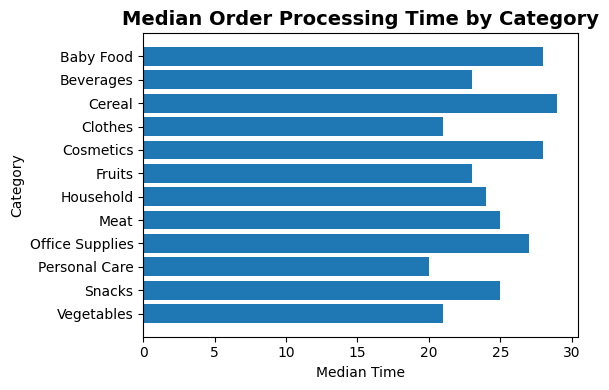

In [ ]:
# Median order processing time by category
time_by_category_sorted = time_by_category.sort_index(ascending=False)
plt.figure(figsize=(6, 4))

plt.barh(time_by_category_sorted.index, time_by_category_sorted["median_days"])
plt.title("Median Order Processing Time by Category", fontsize=14, fontweight='bold')
plt.xlabel("Median Time")
plt.ylabel("Category")

plt.tight_layout()
plt.show()

## **Час обробки замовлення в розрізі країн**

In [ ]:
# Order processing time by country
time_by_country = data.groupby("country")["order_processing_time"].agg(["min", "max", "median"])
time_by_country["median_days"] = time_by_country["median"].dt.days
time_by_country = time_by_country.drop(columns=["median"])
print(time_by_country)

                          min     max  median_days
country                                           
Albania                2 days 49 days           27
Andorra                0 days 50 days           26
Armenia                2 days 50 days           24
Austria                3 days 50 days           29
Belarus                1 days 49 days           26
Belgium                1 days 48 days           28
Bosnia and Herzegovina 1 days 50 days           30
Bulgaria               3 days 48 days           26
Croatia                2 days 45 days           11
Cyprus                 1 days 49 days           23
Czech Republic         0 days 50 days           28
Denmark                0 days 49 days           21
Estonia                3 days 49 days           17
Finland                5 days 43 days           31
France                 1 days 48 days           25
Georgia                7 days 47 days           32
Germany                0 days 49 days           24
Greece                 1 days 4

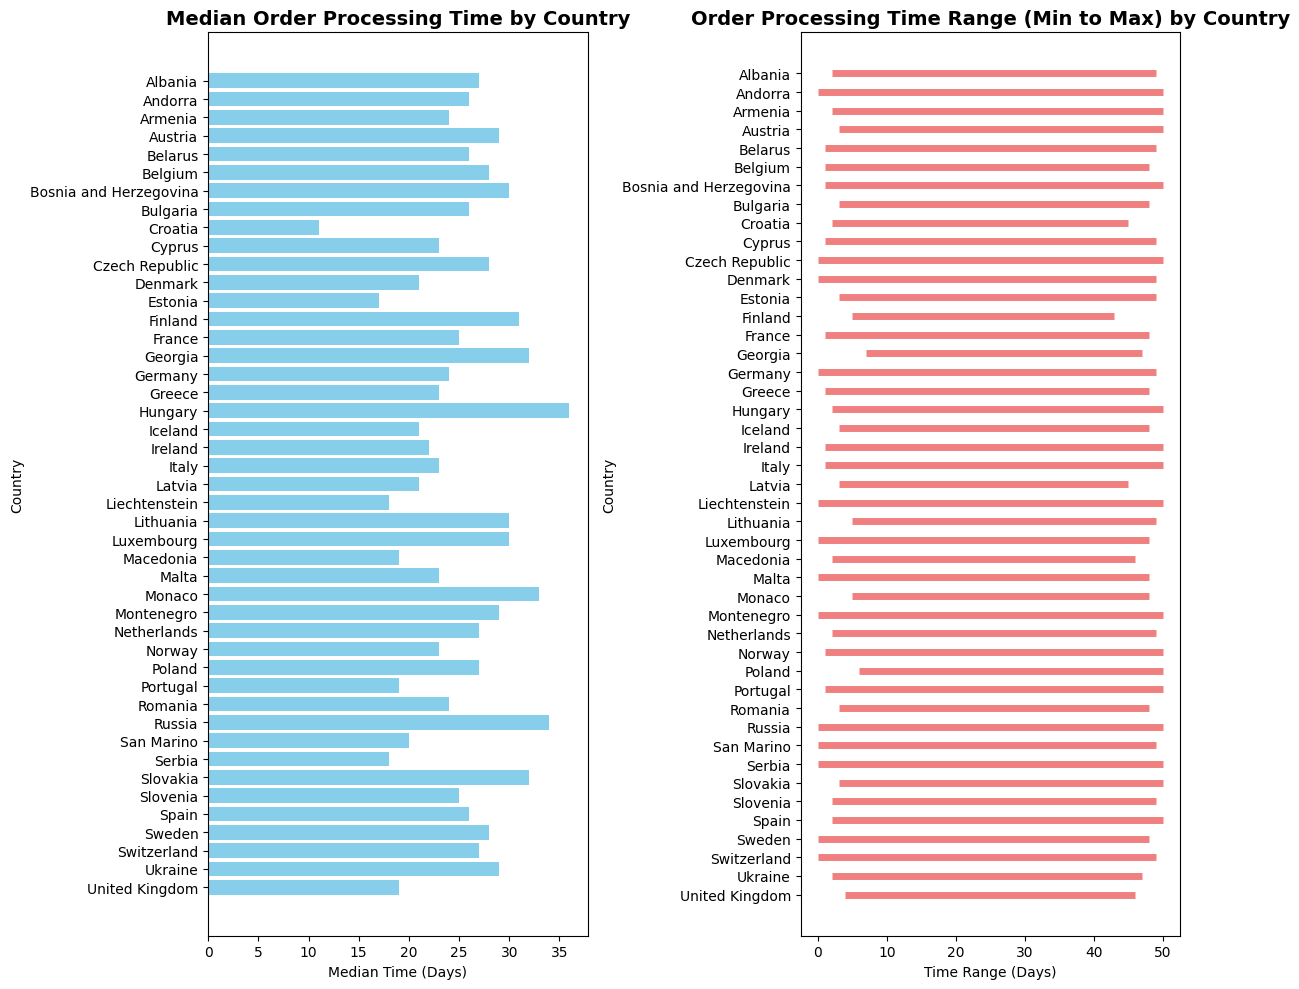

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

axes[0].barh(time_by_country.index, time_by_country["median_days"], color='skyblue')
axes[0].set_title("Median Order Processing Time by Country", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Median Time (Days)")
axes[0].set_ylabel("Country")
axes[0].invert_yaxis()

for i, country in enumerate(time_by_country.index):
    min_days = time_by_country["min"][country].days
    max_days = time_by_country["max"][country].days
    axes[1].hlines(y=i, xmin=min_days, xmax=max_days, color='lightcoral', linewidth=5)
axes[1].set_title("Order Processing Time Range (Min to Max) by Country", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Time Range (Days)")
axes[1].set_ylabel("Country")
axes[1].set_yticks(range(len(time_by_country.index)))
axes[1].set_yticklabels(time_by_country.index)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## **Час обробки замовлення в розрізі регіонів**

In [ ]:
# Order processing time by region
time_by_region = data.groupby("region")["order_processing_time"].agg(["min", "max", "median"])
time_by_region["median_days"] = time_by_region["median"].dt.days
time_by_region = time_by_region.drop(columns=["median"])
print(time_by_region)

          min     max  median_days
region                            
Asia   1 days 50 days           25
Europe 0 days 50 days           25


In [ ]:
# Order processing time by sub-region
time_by_sub_region = data.groupby("sub-region")["order_processing_time"].agg(["min", "max", "median"])
time_by_sub_region["median_days"] = time_by_sub_region["median"].dt.days
time_by_sub_region = time_by_sub_region.drop(columns=["median"])
print(time_by_sub_region)

                   min     max  median_days
sub-region                                 
Eastern Europe  0 days 50 days           29
Northern Europe 0 days 50 days           21
Southern Europe 0 days 50 days           23
Western Asia    1 days 50 days           25
Western Europe  0 days 50 days           26


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

bars_0 = ax[0].bar(time_by_region.index, time_by_region["median_days"])
ax[0].set_title("Median Order Processing Time by Region", fontsize=14, fontweight='bold')
ax[0].set_xticks(range(len(time_by_region.index)))
ax[0].set_xticklabels(time_by_region.index)

for bar in bars_0:
  ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3, f'{bar.get_height()}',
             ha='center', va='bottom', color='black', fontweight='bold')

bars_1 = ax[1].bar(time_by_sub_region.index, time_by_sub_region["median_days"])
ax[1].set_title("Median Order Processing Time by Sub-region", fontsize=14, fontweight='bold')
ax[1].set_xticks(range(len(time_by_sub_region.index)))
ax[1].set_xticklabels(time_by_sub_region.index, rotation=45, ha='right')

for bar in bars_1:
  ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3, f'{bar.get_height()}',
             ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

## **Залежність прибутку від часу обробки замовлення**

In [ ]:
# Profit by order processing time
profit_by_processing_time = data.groupby("order_processing_time")["profit"].sum().reset_index()
profit_by_processing_time["order_processing_time"] = profit_by_processing_time["order_processing_time"].dt.days
print(profit_by_processing_time)

    order_processing_time       profit
0                       0   6967594.12
1                       1   6809916.94
2                       2   8830276.81
3                       3   9412351.70
4                       4   9319976.51
5                       5  11276412.01
6                       6   9517301.39
7                       7  12822986.01
8                       8   8278980.87
9                       9  11879950.09
10                     10   3397577.40
11                     11  11057028.66
12                     12  11562784.89
13                     13   6296961.45
14                     14   7371059.48
15                     15   8263645.40
16                     16  14372732.34
17                     17  12285558.66
18                     18   5123042.88
19                     19  14305161.52
20                     20   6816365.43
21                     21  13379490.29
22                     22   6270025.27
23                     23   9323375.22
24                     24

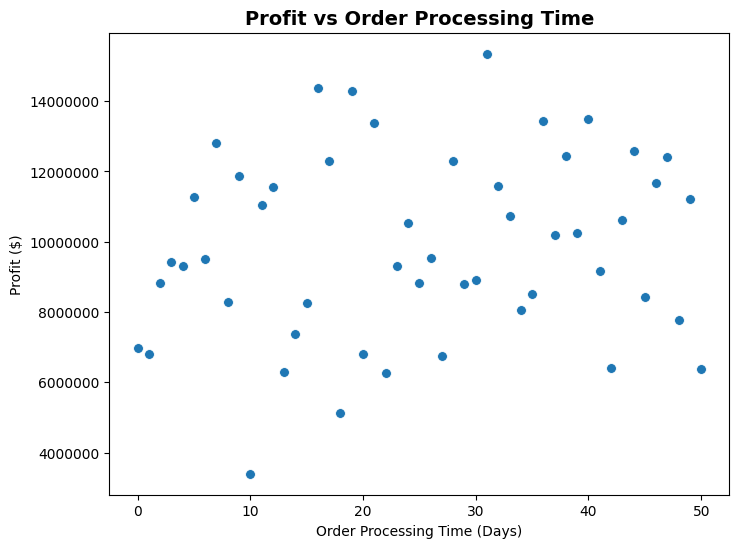

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x="order_processing_time", y="profit", data=profit_by_processing_time, s=50)
plt.title("Profit vs Order Processing Time", fontsize=14, fontweight='bold')
plt.xlabel("Order Processing Time (Days)")
plt.ylabel("Profit ($)")
plt.ticklabel_format(style='plain', axis='y')

plt.show()

## **Динаміка продажів (за датою, роками, місяцями, днями тижня)**

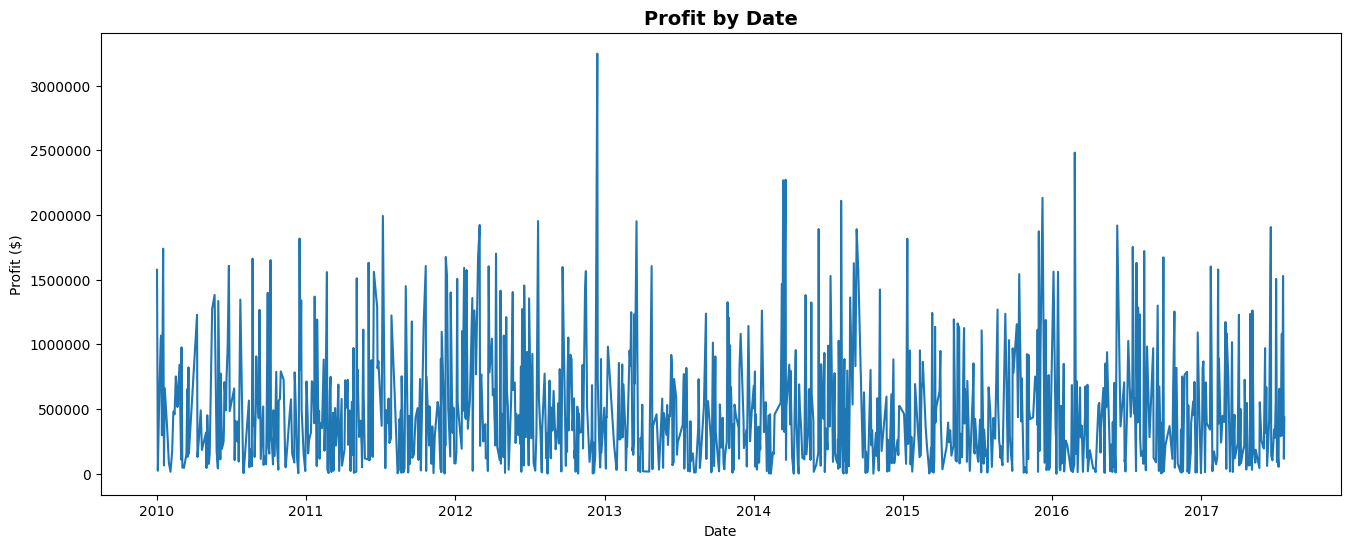

In [ ]:
# Profit by order date
profit_by_date = data.groupby("order_date")["profit"].sum().reset_index()

plt.figure(figsize=(16, 6))

plt.plot(profit_by_date["order_date"], profit_by_date["profit"])
plt.title("Profit by Date", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Profit ($)")
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [ ]:
# Profit by year, month, day of week
profit_by_year = data.groupby([data["order_date"].dt.year])["profit"].sum()
profit_by_month = data.groupby([data["order_date"].dt.month])["profit"].sum()
profit_by_day_of_week = data.groupby([data["order_date"].dt.day_name()])["profit"].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
profit_by_day_of_week = profit_by_day_of_week.reindex(days_order)

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

ax[0].plot(profit_by_year.index, profit_by_year.values, marker='o')
ax[0].set_title("Profit by Year", fontsize=14, fontweight='bold')
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Profit ($)")
ax[0].ticklabel_format(style='plain', axis='y')

ax[1].plot(profit_by_month.index, profit_by_month.values, marker='o')
ax[1].set_title("Profit by Month", fontsize=14, fontweight='bold')
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Profit ($)")
ax[1].ticklabel_format(style='plain', axis='y')

ax[2].plot(profit_by_day_of_week.index, profit_by_day_of_week.values, marker='o')
ax[2].set_title("Profit by Day of Week", fontsize=14, fontweight='bold')
ax[2].set_xlabel("Day of Week")
ax[2].set_ylabel("Profit ($)")
ax[2].ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()

## **Динаміка продажів в розрізі категорій (за датою, роками, місяцями, днями тижня)**

In [ ]:
# Profit by date for different categories
profit_by_date_category = data.groupby(["order_date", "category"])["profit"].sum().reset_index()

g = sns.relplot(
    data=profit_by_date_category,
    x="order_date",
    y="profit",
    col="category",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Profit by Date for Different Categories", fontsize=16, fontweight='bold')
g.set_titles("Category: {col_name}", fontweight='bold')
g.set_axis_labels("Date", "Profit ($)")

for ax_sub in g.axes.flat:
  ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

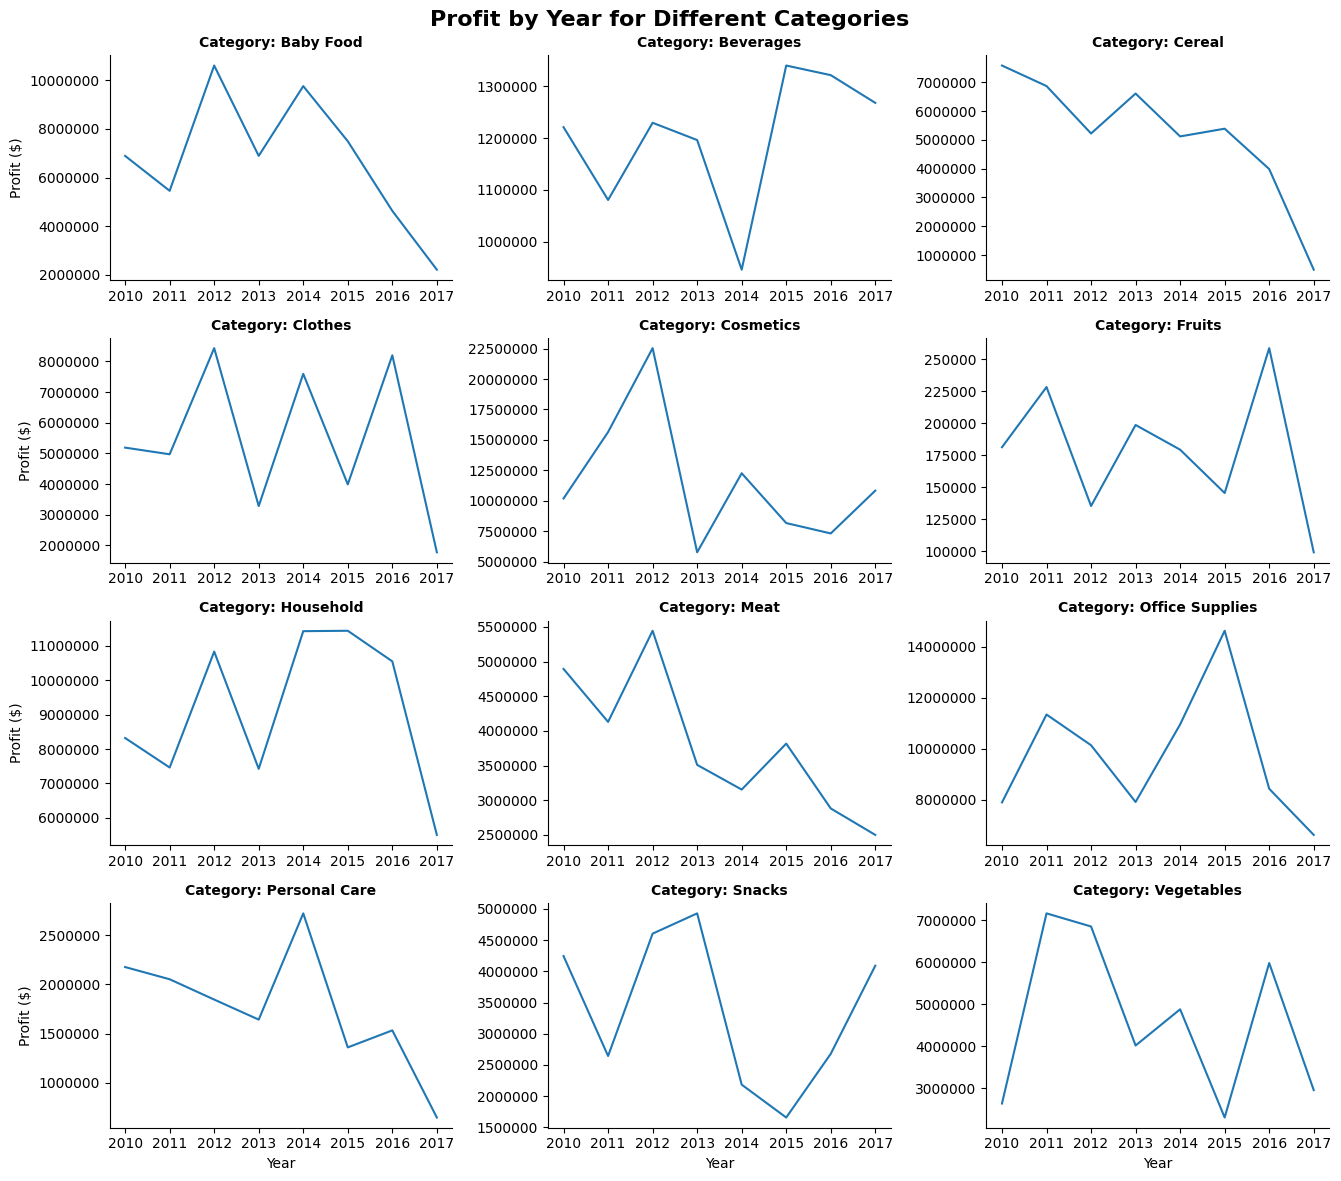

In [ ]:
# Profit by year for different categories
profit_by_year_category = data.groupby([data["order_date"].dt.year, "category"])["profit"].sum().reset_index()

g = sns.relplot(
    data=profit_by_year_category,
    x="order_date",
    y="profit",
    col="category",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Profit by Year for Different Categories", fontsize=16, fontweight='bold')
g.set_titles("Category: {col_name}", fontweight='bold')
g.set_axis_labels("Year", "Profit ($)")

for ax_sub in g.axes.flat:
  ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

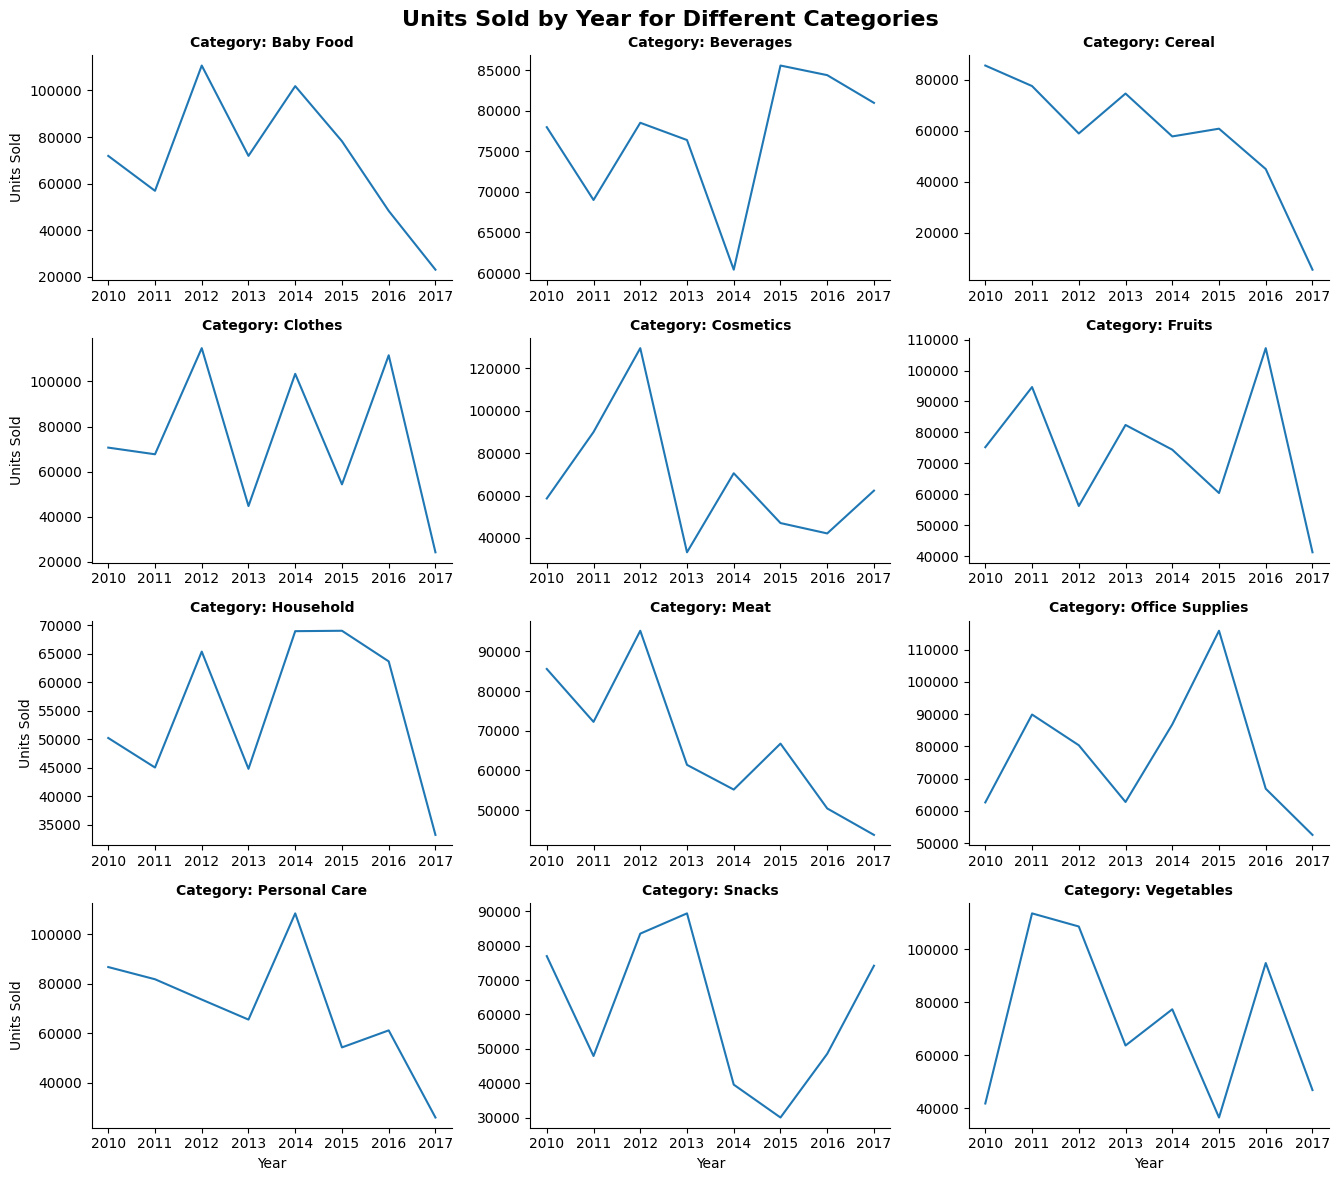

In [ ]:
# Units sold by year for different categories
units_by_year_category = data.groupby([data["order_date"].dt.year, "category"])["units_sold"].sum().reset_index()

g = sns.relplot(
    data=units_by_year_category,
    x="order_date",
    y="units_sold",
    col="category",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Units Sold by Year for Different Categories", fontsize=16, fontweight='bold')
g.set_titles("Category: {col_name}", fontweight='bold')
g.set_axis_labels("Year", "Units Sold")

for ax_sub in g.axes.flat:
  ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

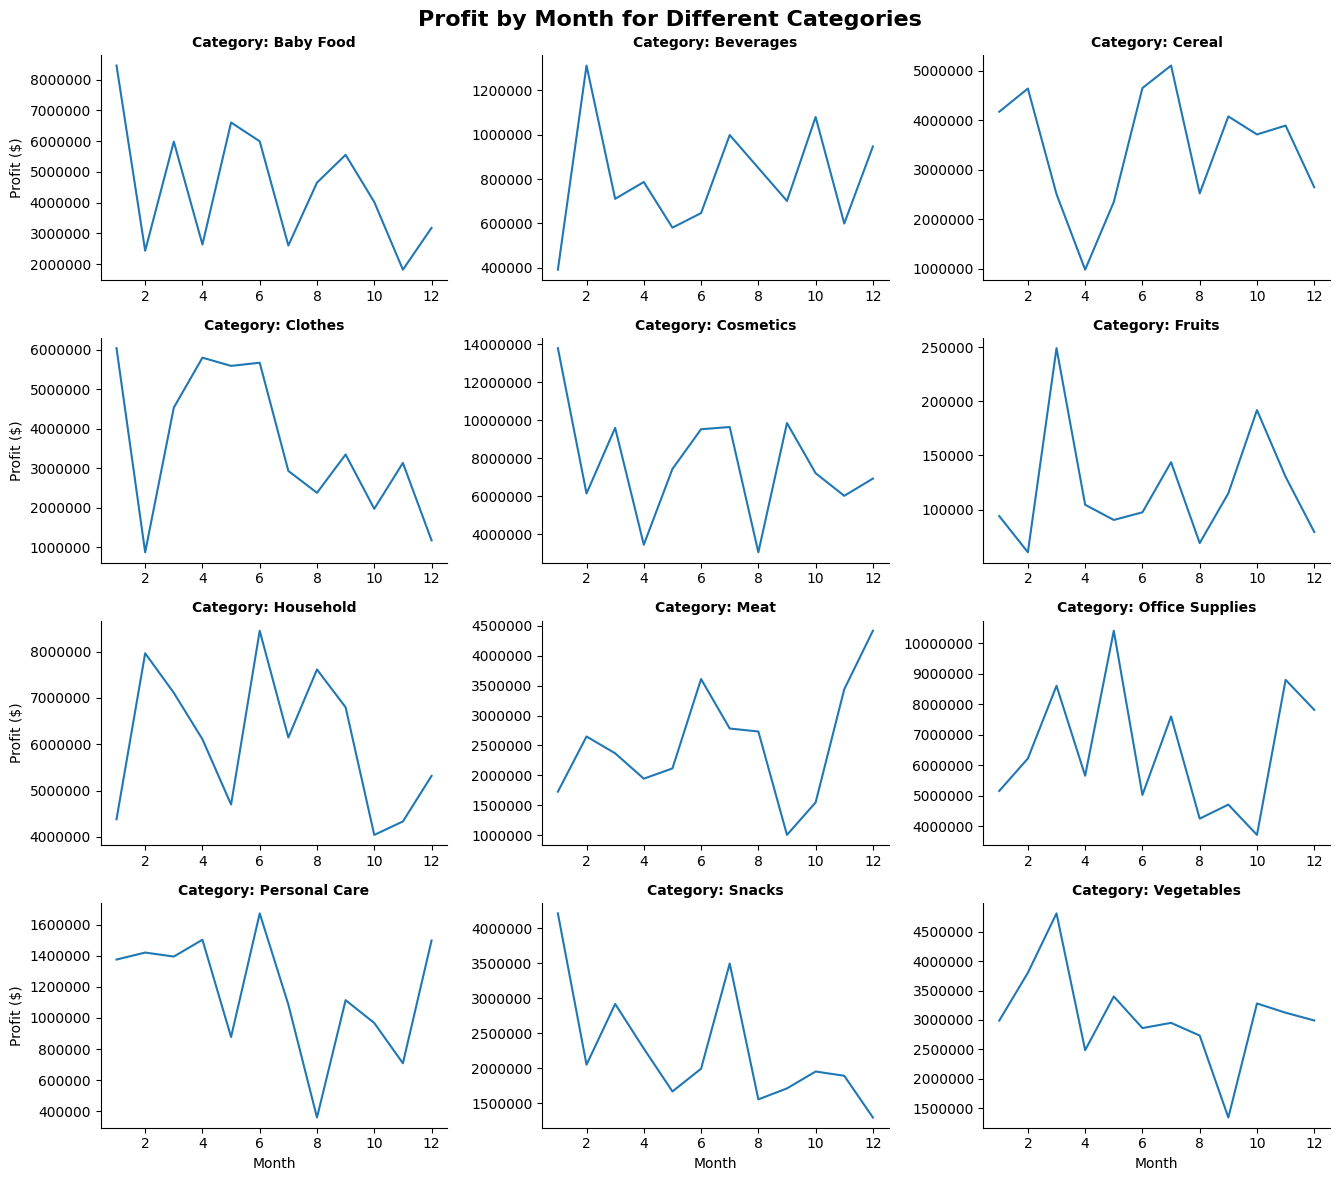

In [ ]:
# Profit by month for different categories
profit_by_month_category = data.groupby([data["order_date"].dt.month, "category"])["profit"].sum().reset_index()

g = sns.relplot(
    data=profit_by_month_category,
    x="order_date",
    y="profit",
    col="category",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Profit by Month for Different Categories", fontsize=16, fontweight='bold')
g.set_titles("Category: {col_name}", fontweight='bold')
g.set_axis_labels("Month", "Profit ($)")

for ax_sub in g.axes.flat:
  ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

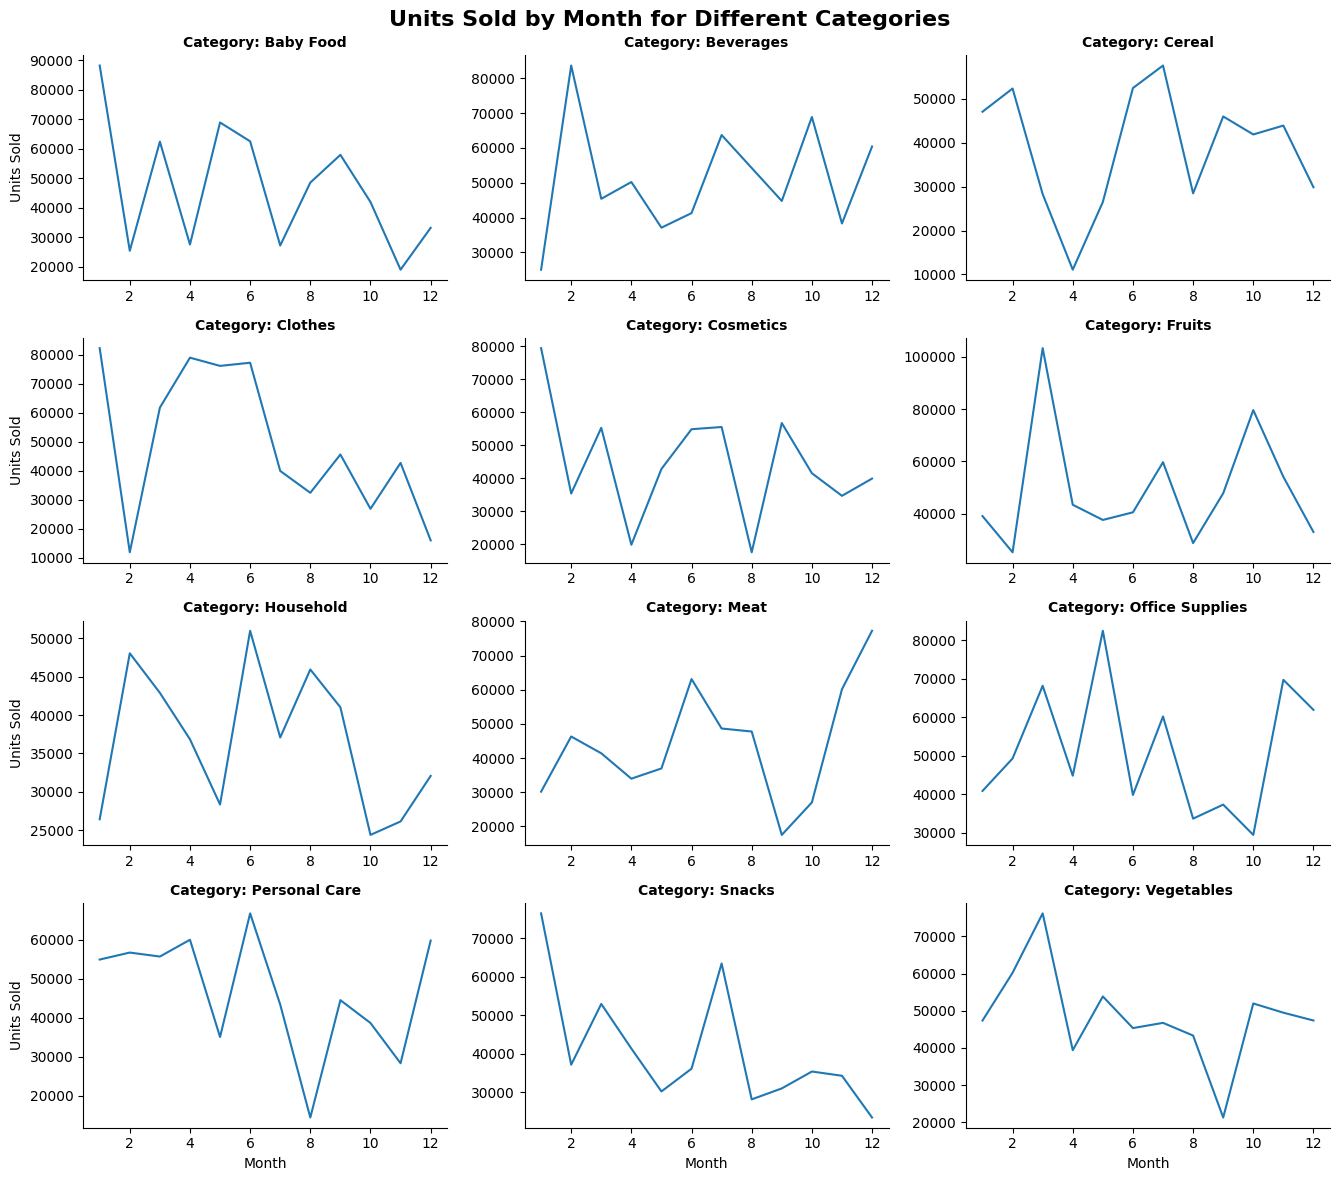

In [ ]:
# Units sold by month for different categories
units_by_month_category = data.groupby([data["order_date"].dt.month, "category"])["units_sold"].sum().reset_index()

g = sns.relplot(
    data=units_by_month_category,
    x="order_date",
    y="units_sold",
    col="category",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Units Sold by Month for Different Categories", fontsize=16, fontweight='bold')
g.set_titles("Category: {col_name}", fontweight='bold')
g.set_axis_labels("Month", "Units Sold")

for ax_sub in g.axes.flat:
  ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

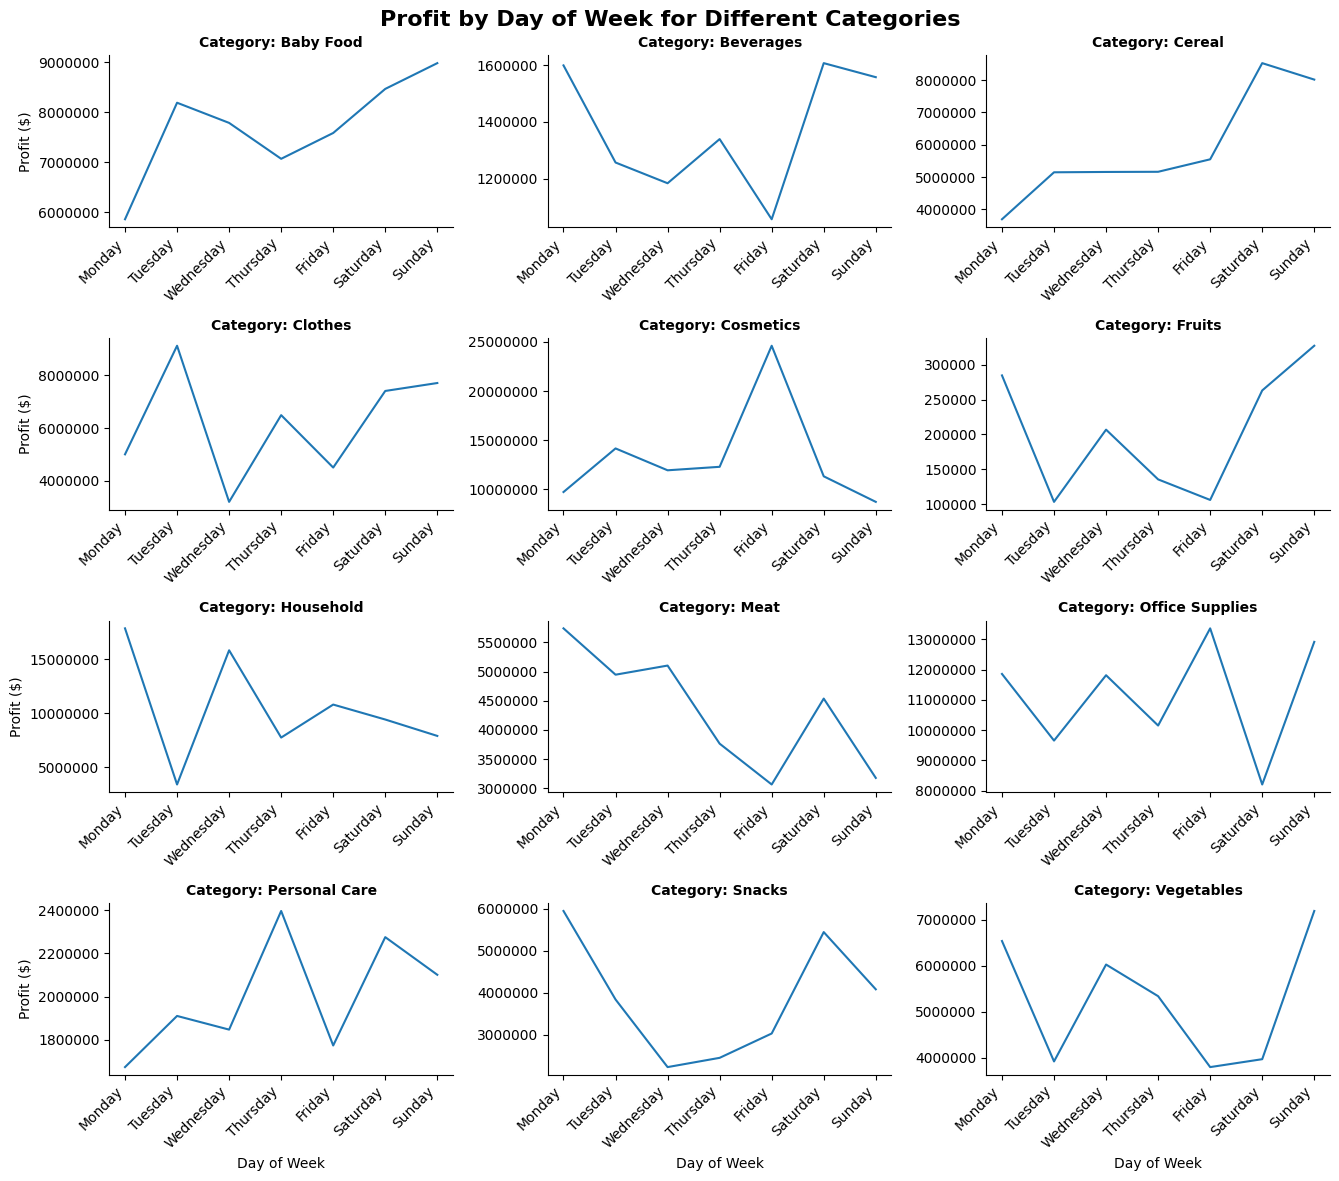

In [ ]:
# Profit by day of week for different categories
profit_by_day_category = data.groupby([data["order_date"].dt.day_name(), "category"])["profit"].sum().reset_index()
profit_by_day_category["order_date"] = pd.Categorical(
    profit_by_day_category["order_date"],
    categories=days_order,
    ordered=True
)

g = sns.relplot(
    data=profit_by_day_category,
    x="order_date",
    y="profit",
    col="category",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Profit by Day of Week for Different Categories", fontsize=16, fontweight='bold')
g.set_titles("Category: {col_name}", fontweight='bold')
g.set_axis_labels("Day of Week", "Profit ($)")

for ax_sub in g.axes.flat:
    num_days = len(days_order)
    ax_sub.set_xticks(range(num_days))
    ax_sub.set_xticklabels(days_order, rotation=45, ha='right')
    ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


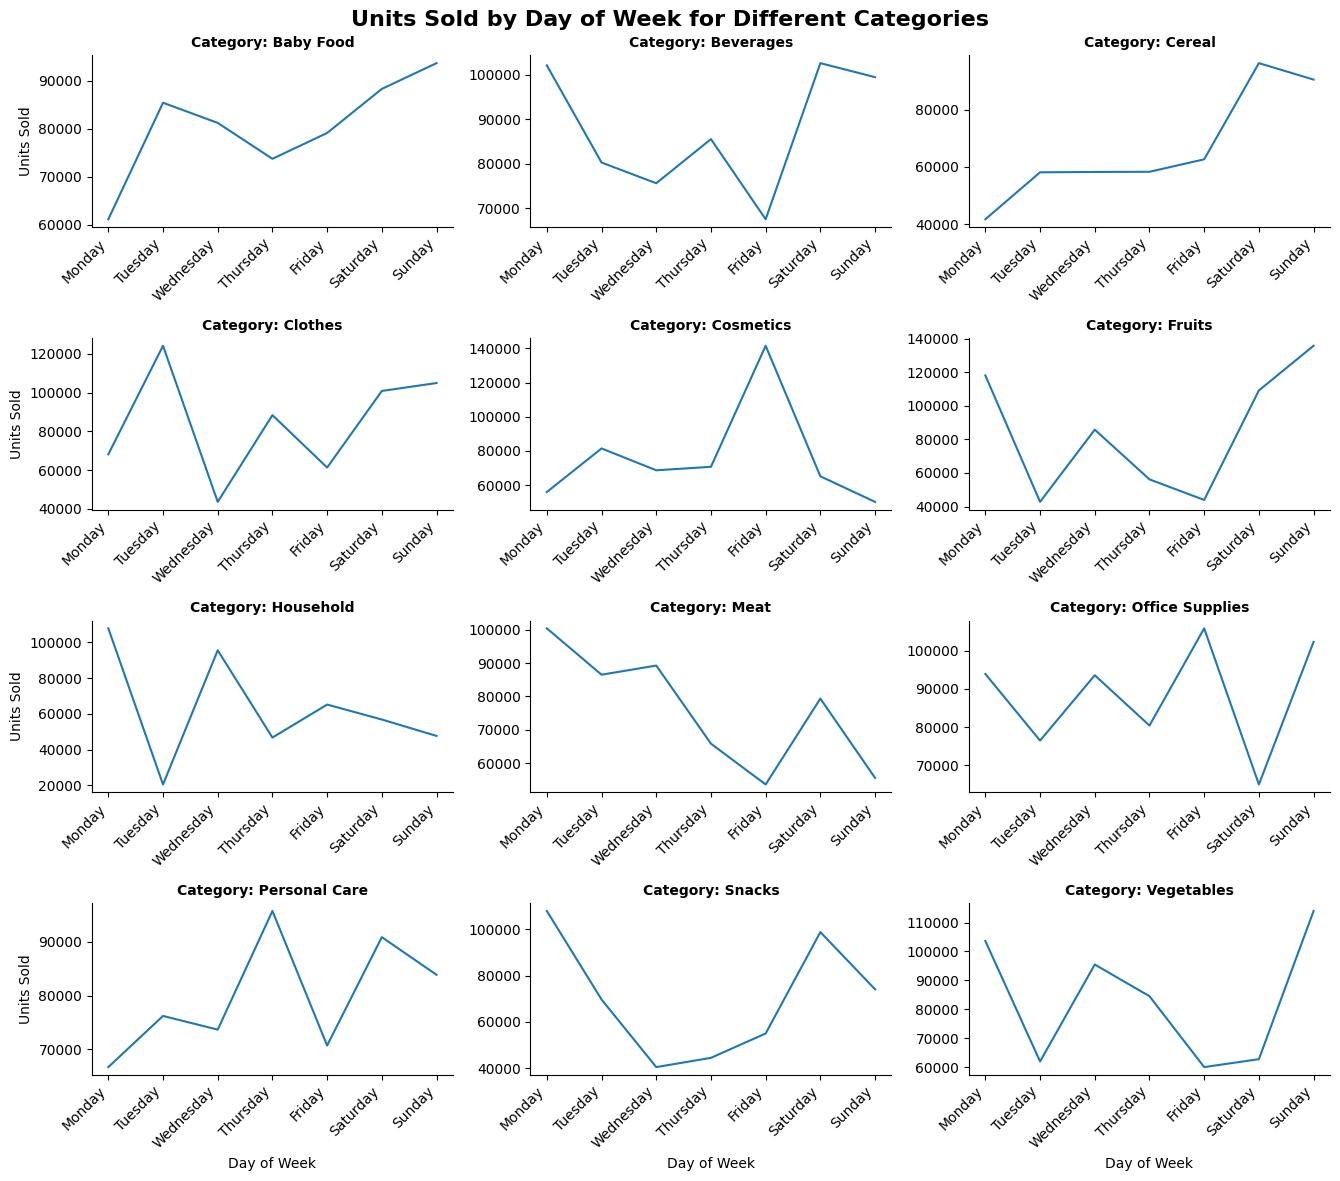

In [ ]:
# Units sold by day of week for different categories
units_by_day_category = data.groupby([data["order_date"].dt.day_name(), "category"])["units_sold"].sum().reset_index()
units_by_day_category["order_date"] = pd.Categorical(
    units_by_day_category["order_date"],
    categories=days_order,
    ordered=True
)

g = sns.relplot(
    data=units_by_day_category,
    x="order_date",
    y="units_sold",
    col="category",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Units Sold by Day of Week for Different Categories", fontsize=16, fontweight='bold')
g.set_titles("Category: {col_name}", fontweight='bold')
g.set_axis_labels("Day of Week", "Units Sold")

for ax_sub in g.axes.flat:
    num_days = len(days_order)
    ax_sub.set_xticks(range(num_days))
    ax_sub.set_xticklabels(days_order, rotation=45, ha='right')
    ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## **Динаміка продажів в розрізі країн (за датою, роками, місяцями, днями тижня)**

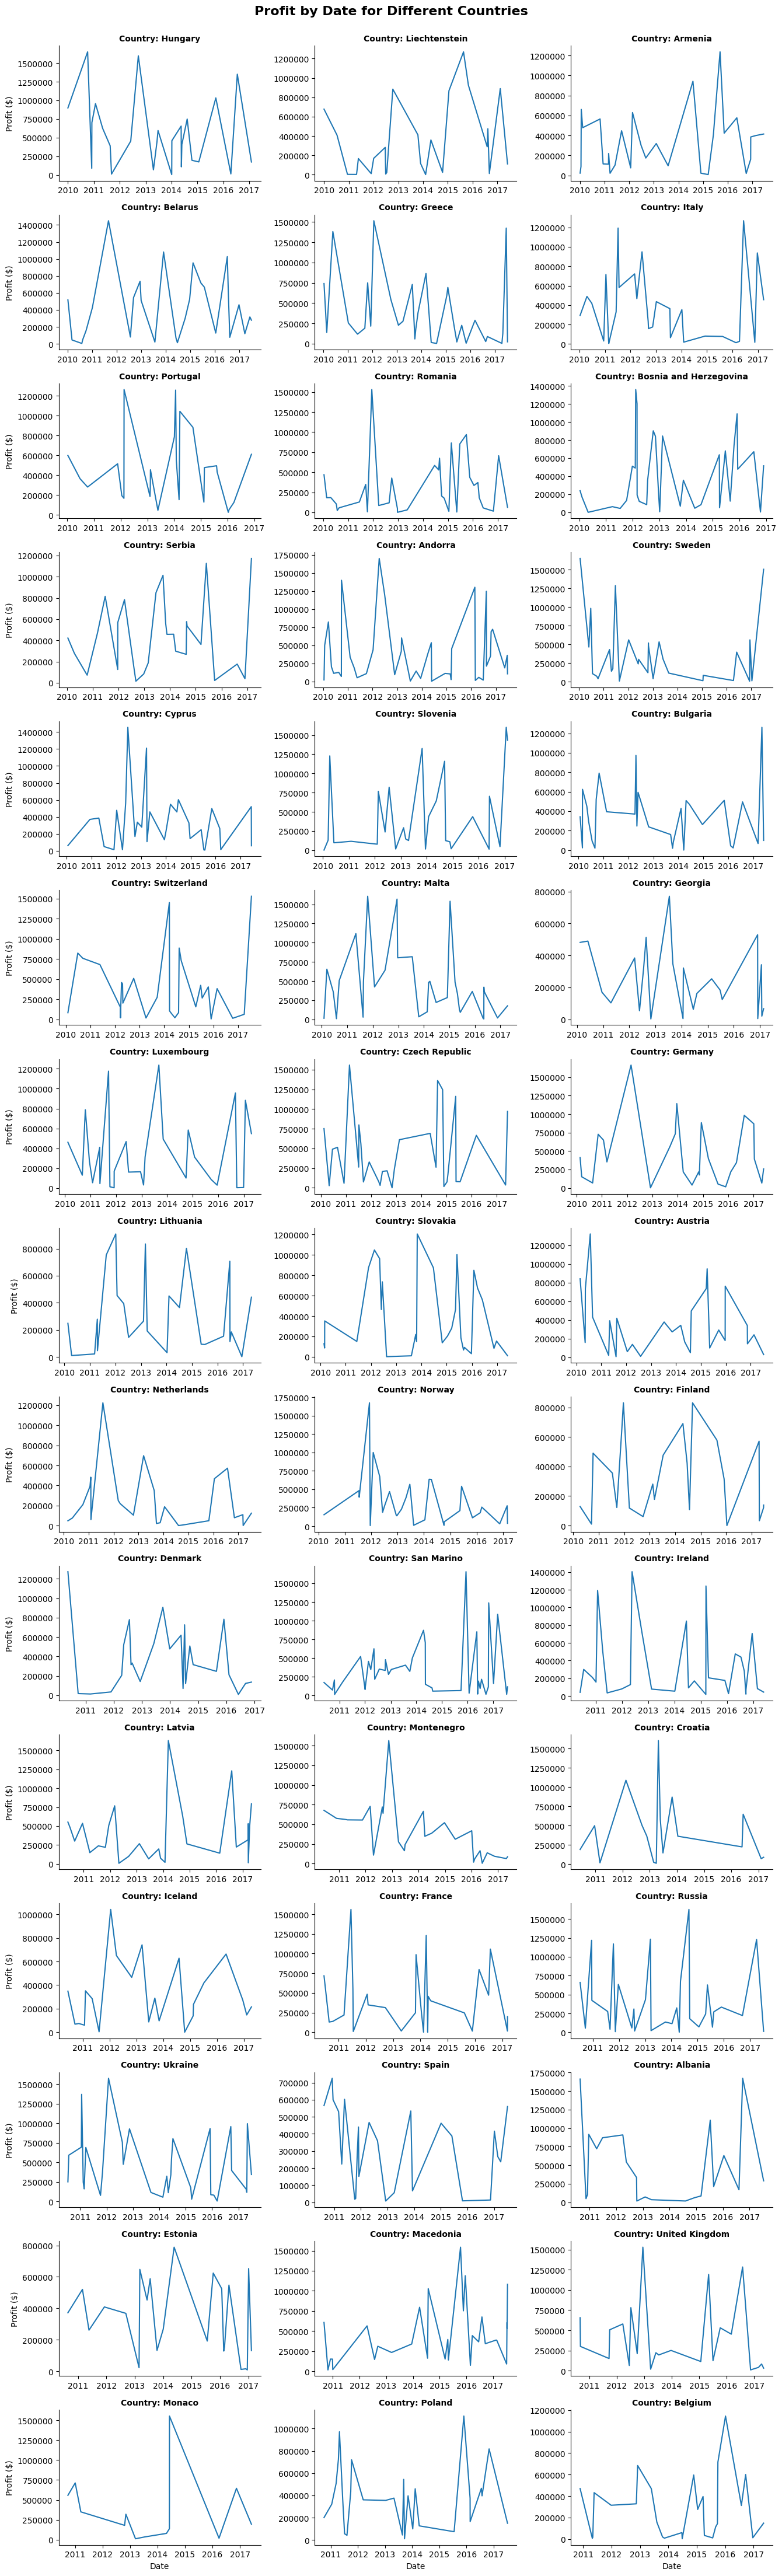

In [ ]:
# Profit by date for different countries
profit_by_date_country = data.groupby(["order_date", "country"])["profit"].sum().reset_index()

g = sns.relplot(
    data=profit_by_date_country,
    x="order_date",
    y="profit",
    col="country",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Profit by Date for Different Countries", fontsize=16, fontweight='bold')
g.set_titles("Country: {col_name}", fontweight='bold')
g.set_axis_labels("Date", "Profit ($)")

for ax_sub in g.axes.flat:
  ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

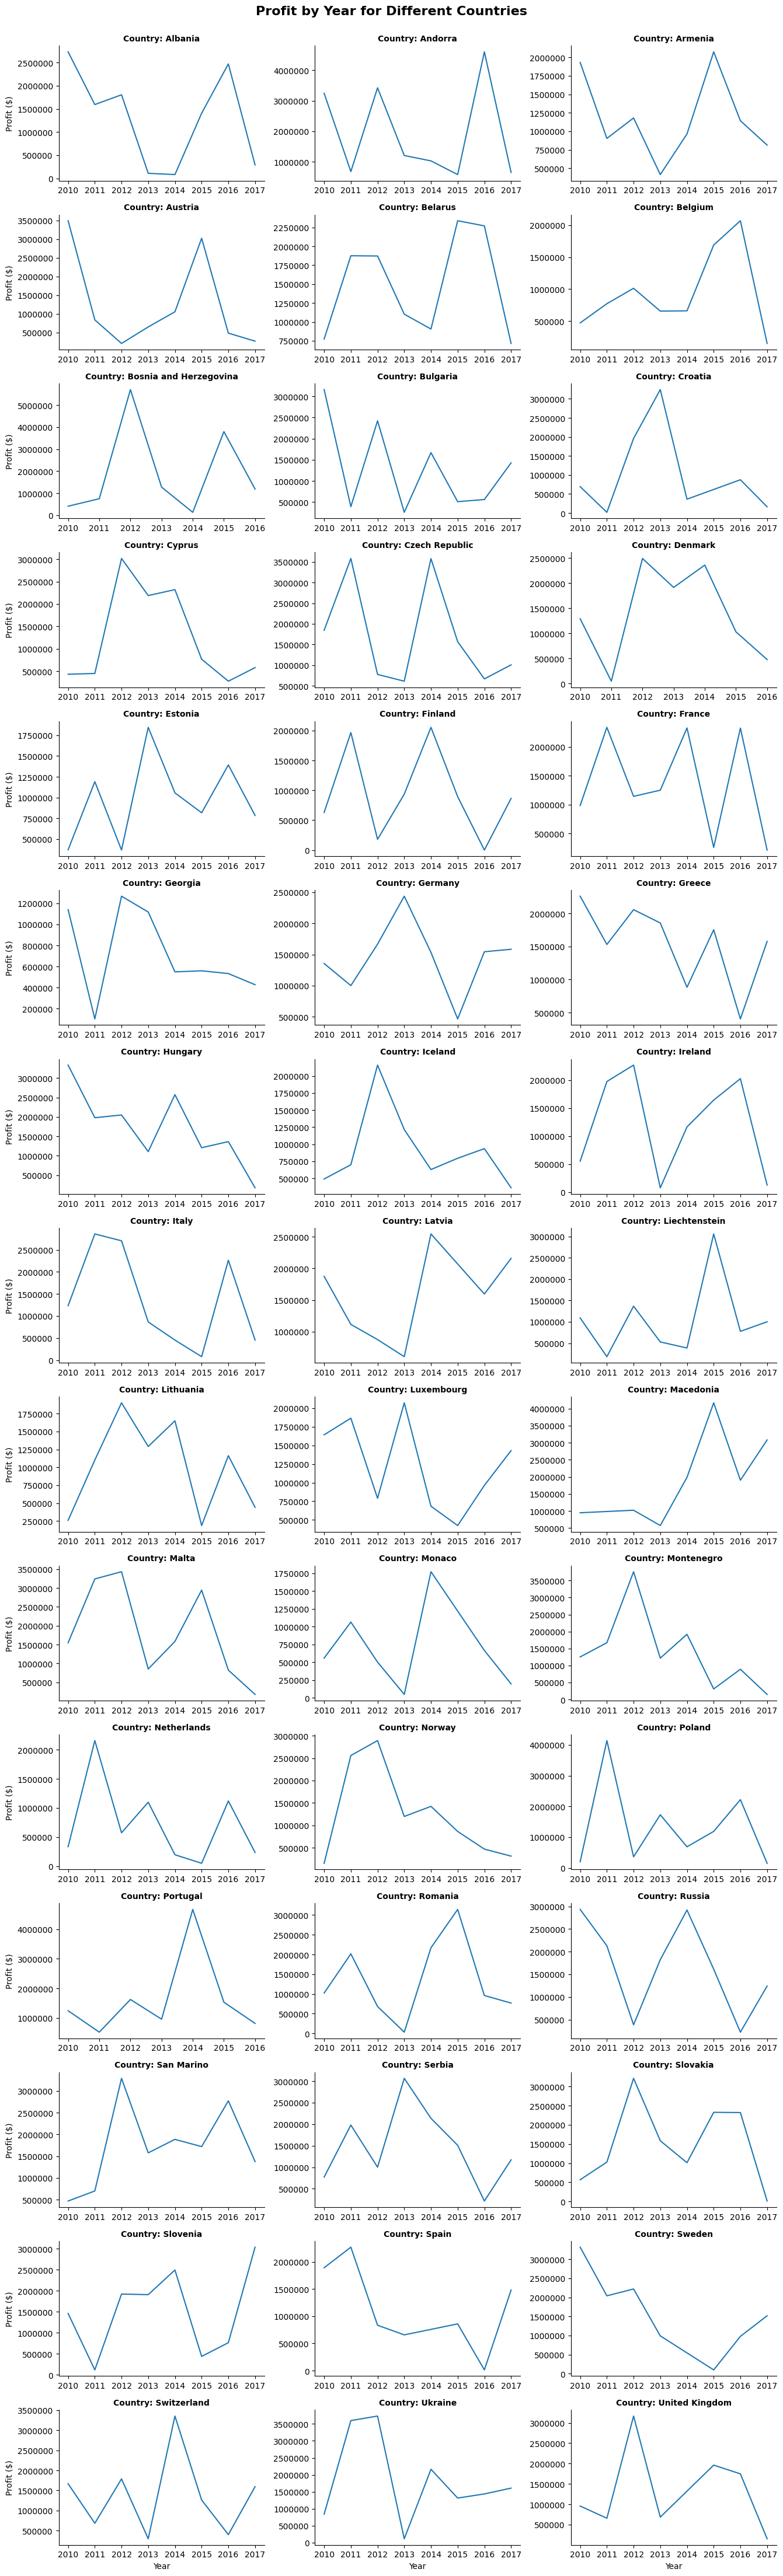

In [ ]:
# Profit by year for different countries
profit_by_year_country = data.groupby([data["order_date"].dt.year, "country"])["profit"].sum().reset_index()

g = sns.relplot(
    data=profit_by_year_country,
    x="order_date",
    y="profit",
    col="country",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Profit by Year for Different Countries", fontsize=16, fontweight='bold')
g.set_titles("Country: {col_name}", fontweight='bold')
g.set_axis_labels("Year", "Profit ($)")

for ax_sub in g.axes.flat:
  ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

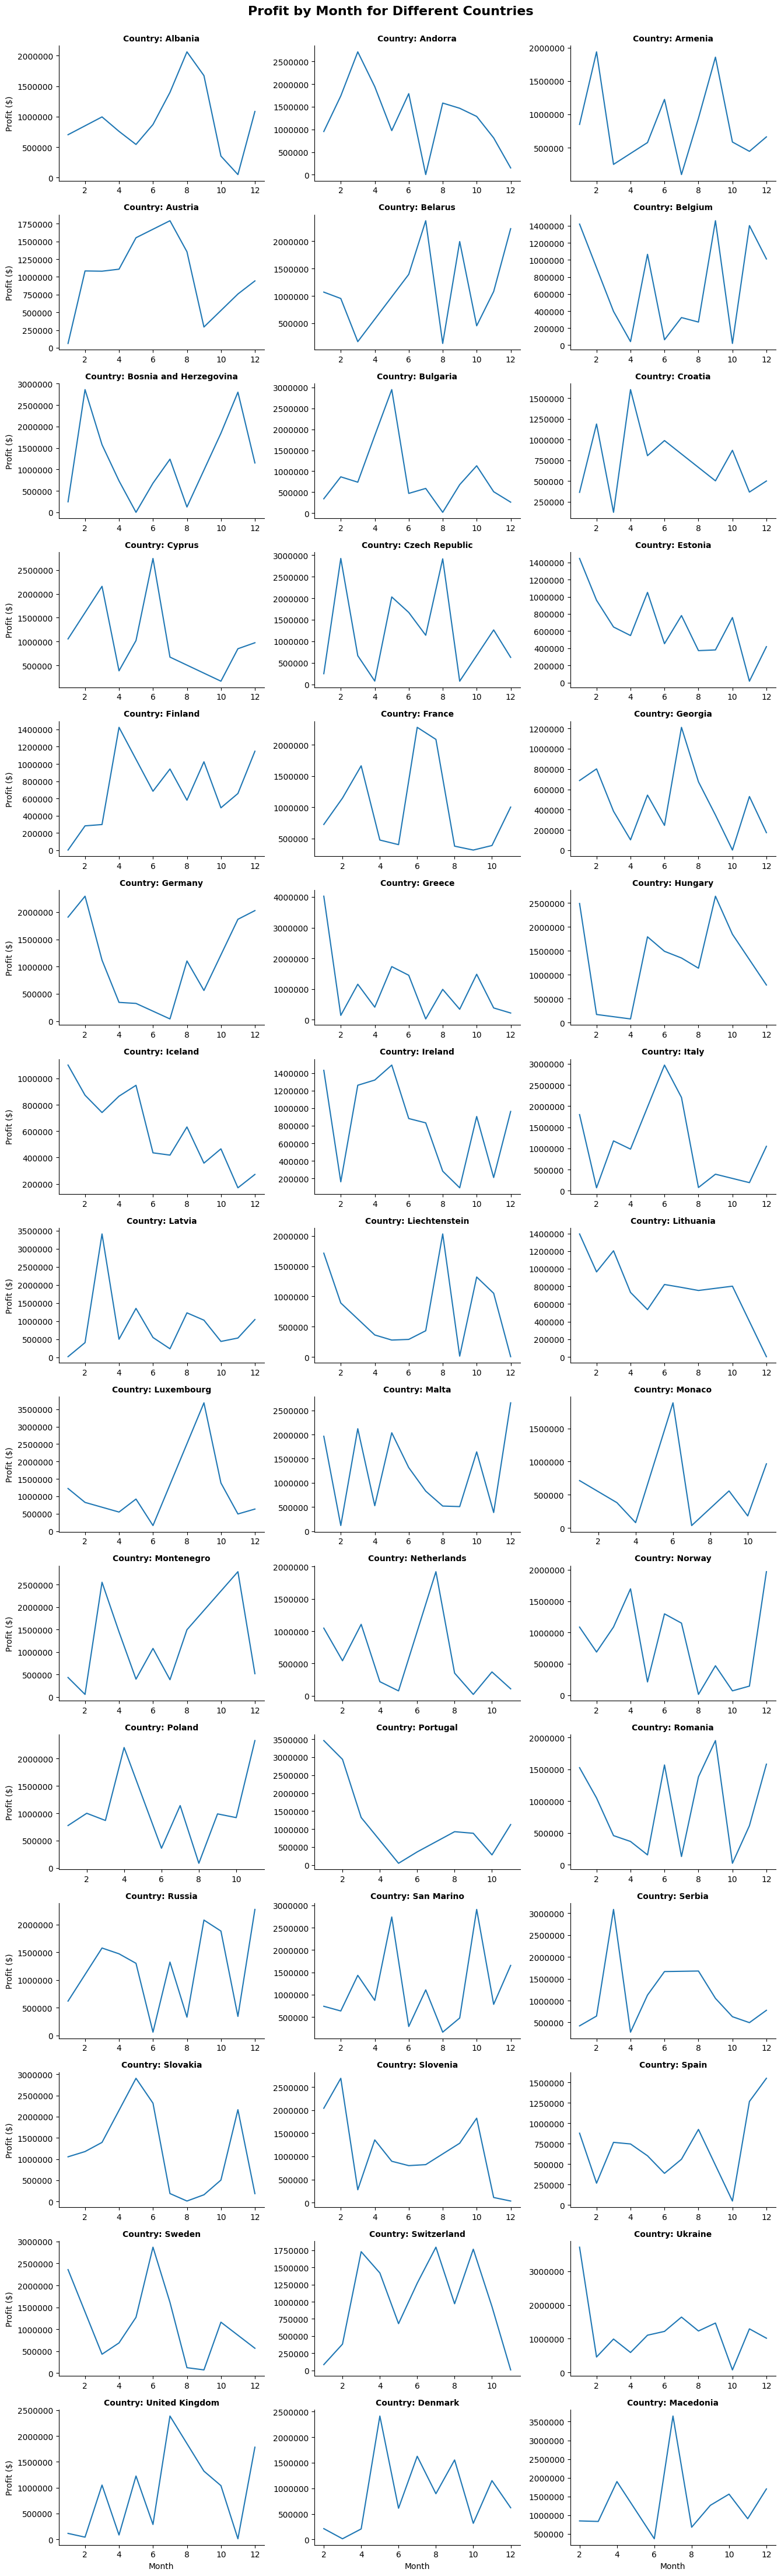

In [ ]:
# Profit by month for different countries
profit_by_month_country = data.groupby([data["order_date"].dt.month, "country"])["profit"].sum().reset_index()

g = sns.relplot(
    data=profit_by_month_country,
    x="order_date",
    y="profit",
    col="country",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Profit by Month for Different Countries", fontsize=16, fontweight='bold')
g.set_titles("Country: {col_name}", fontweight='bold')
g.set_axis_labels("Month", "Profit ($)")

for ax_sub in g.axes.flat:
  ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

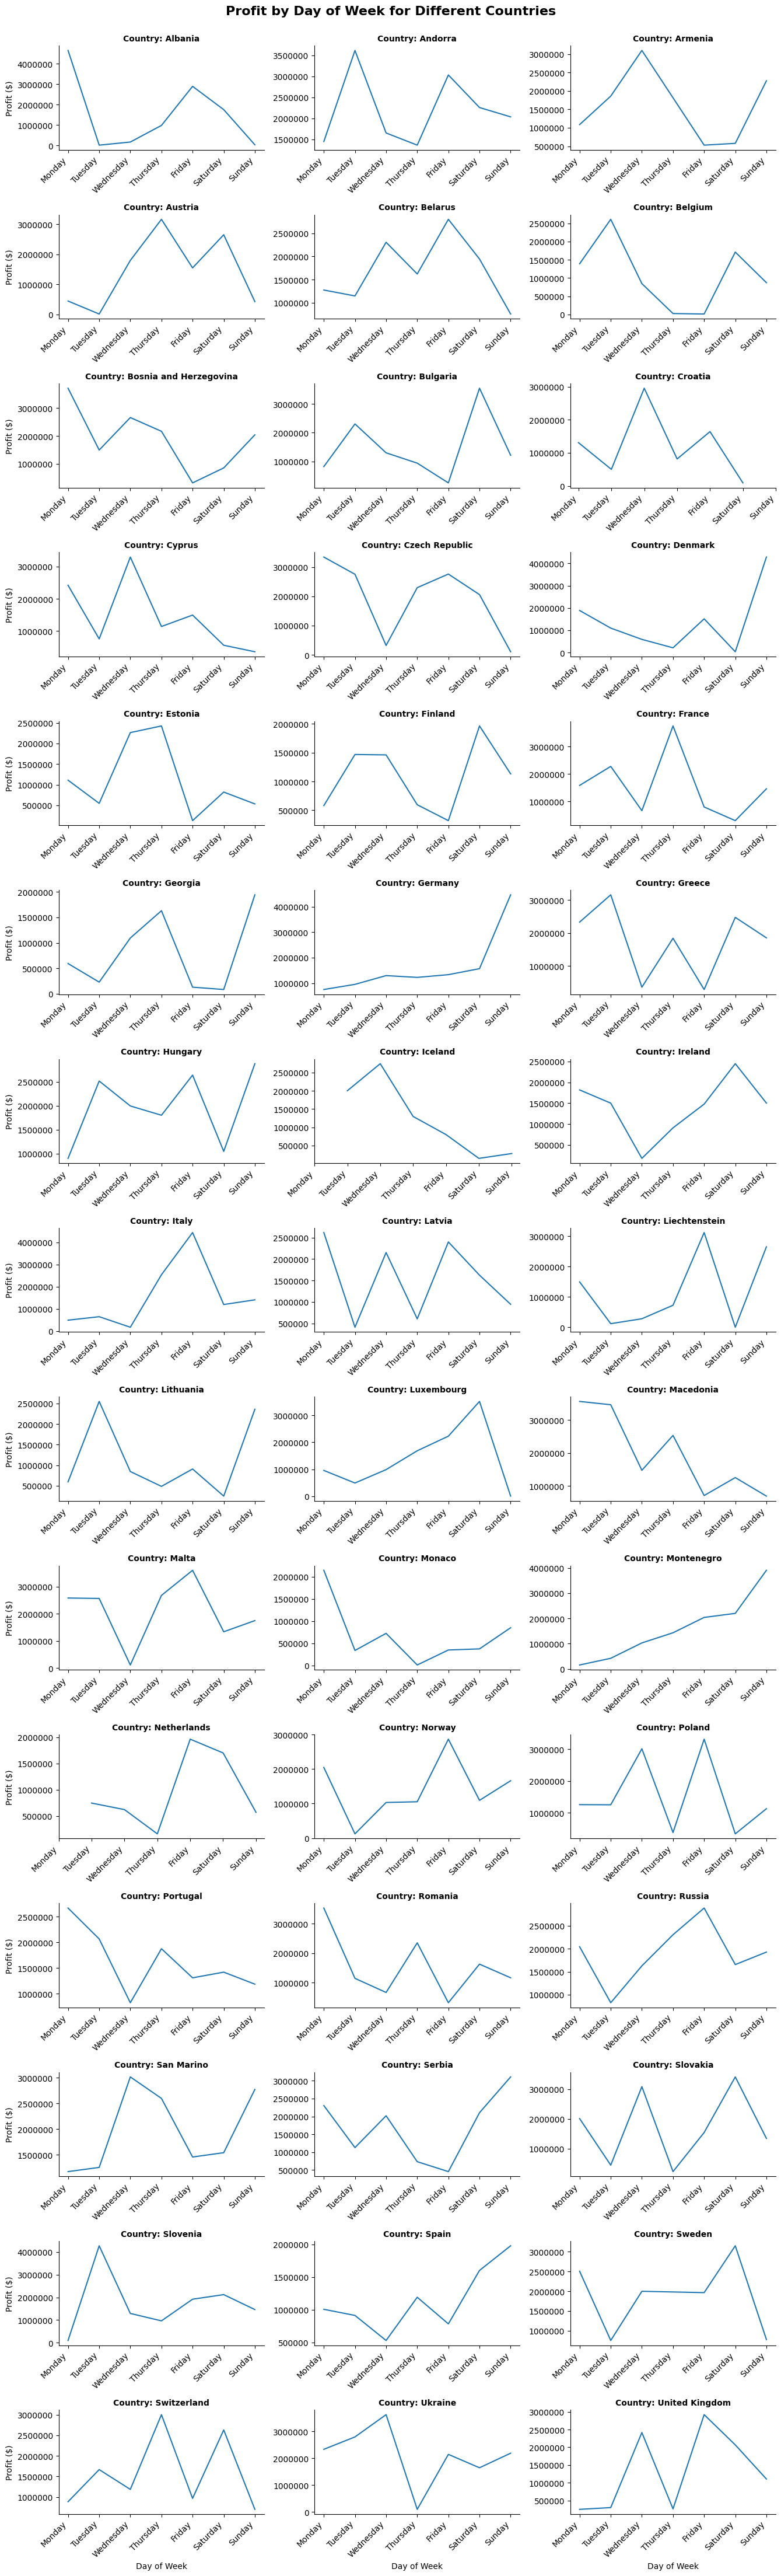

In [ ]:
# Profit by day of week for different countries
profit_by_day_country = data.groupby([data["order_date"].dt.day_name(), "country"])["profit"].sum().reset_index()
profit_by_day_country["order_date"] = pd.Categorical(
    profit_by_day_country["order_date"],
    categories=days_order,
    ordered=True
)

g = sns.relplot(
    data=profit_by_day_country,
    x="order_date",
    y="profit",
    col="country",
    col_wrap=3,
    kind="line",
    height=3,
    aspect=1.5,
    facet_kws={'sharex': False, 'sharey': False}
)

g.fig.suptitle("Profit by Day of Week for Different Countries", fontsize=16, fontweight='bold')
g.set_titles("Country: {col_name}", fontweight='bold')
g.set_axis_labels("Day of Week", "Profit ($)")

for ax_sub in g.axes.flat:
    num_days = len(days_order)
    ax_sub.set_xticks(range(num_days))
    ax_sub.set_xticklabels(days_order, rotation=45, ha='right')
    ax_sub.ticklabel_format(style='plain', axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# **Reporting**
- Загальні метрики свідчать про досить **високу рентабельність** діяльності компаніі, адже загальний прибуток складає ≈ 29.45% від загального доходу.
  
  **Широка георгафія**: охоплює 45 країн Європи та Азії.

  **Масштабність операцій**: загальна кількість замовлень становить 1328, а загальна кількість проданих одиниць - 6,576,524.

  **Широкий діапазон цін** на продукцію через різноманітність асортименту.

- **Найбільш прибуткові категорії**: *Cosmetics, Office Supplies, Household*.

 **Найбільші за обсягом продажів категорії**: *Office Supplies, Beverages, Fruits*.

 **Найбільш рентабельні категорії**: *Clothes (67,2%), Cosmetics (39.8%), Cereal (43,1%)*.

- **Країни з найбільшим прибутком**: *Andorra, Ukraine, Malta*.

 **Найбільші за обсягом продажів країни**: *Macedonia, San Marino, Andorra*.

 **Субрегіони з найбільшим прибутком та найбільшим обсягом продажів**: *Southern Europe, Northern Europe, Western Europe*.

 **Країни Європи приносять 94,7% прибутку компаніі**, Азії -  лише 5,3%.

 Аналіз категорій з **максимальною кількістю проданих одиниць для кожної країни** показує диверсифікованість ринків та вподобань споживачів у різних країнах.

 Аналіз **категорій з максимальним прибутком для кожної країни** показує, що для більшості країн це загальні лідери компанії: *Cosmetics, Office Supplies, Household, Baby Food*. Але є нетипові лідери для країн (наприклад, *Estonia: Clothes; Georgia: Meat, Poland: Cereal; Spane: Vegetables*).

 Для деяких країн **категорія з максимальним прибутком та категорія з максимальною кількістю проданих одиниць збігаються** (наприклад, *Albania: Cosmetics, Austria: Office Supplies*). Проте, для багатьох країн ці категорії **відрізняються** (наприклад, *Armenia: Meat* за одиницями, *Household* за прибутком; *Belgium: Fruits* за одиницями, *Office Supplies* за прибутком).

- **Продажі в розрізі каналів продажу (онлайн, офлайн)** в цілому по компанії є практично однаковими:
 - прибуток: *Online* - 49.45%, *Offline* - 50.55%;
 - кількість замовлень: *Online* - 663, *Offline* - 665.

 Але в **розрізі країн** цей показник суттєво змінюється (наприклад, для *United Kingdom* прибуток(*Online* - 71%, *Offline* - 29%), кількість замовлень(*Online* - 69,6%, *Offline* - 30,4%).

 **В розрізі категорій**: *Household, Bevarages, Cereal, Clothes, Snacks* переважають за кількістю замовлень *Online*. Тоді як *Baby Food, Office Supplies, Personal Care, Vegetables* переважають за кількістю замовлень *Offline*.

- **Медіанний час обробки замовлення** становить 25 днів (max=50, min=0).

 **Медіанний час обробки замовлення в розрізі країн** суттєво відрізняється (найбільший - 36 для *Hungary*, найменший - 11 для *Croatia*).

 **В розрізі категорій товарів** в діапазоні між 20 (*Personal Care*) та 29 (*Cereal*).

 **В розрізі регіонів** однаковий.

 **В розрізі субрегіонів**: найменший (21 день) для *Northern Europe*, найбільший (29 днів) для *Eastern Europe*.

-  **Прибуток не залежить  від часу, необхідного на відвантаження товару**, але зменшення часу обробки замовлення може покращити лояльність клієнтів.

- **Найбільш прибутковий рік** - *2012*. Найменш прибутковий - *2017*.

 **Найбільший прибуток** у *січні* (за місяцями продажів) та у *п'ятницю* (за днями тижнів). Найменший прибуток у *серпні* та у *четвер*.

 Є чітко виражені **сезонні категорії товарів за місяцями** (*Fruits, Vegetables, Beverages* та *Clothes* демонструють чітку сезонність), а також **категорії, на продажі яких сильно впливають певні періоди року** (*Cosmetics, Personal Care, Household, Snacks, Meat* часто мають піки). **З помірними коливаннями**: *Cereal, Baby Food, Office Supplies*.

 **Циклічність за днями тижня**: багато категорій, особливо продукти харчування (*Baby Food, Beverages, Cereal, Fruits, Household, Meat, Snacks, Vegetables*), а також *Clothes* та *Cosmetics*, демонструють зростання продажів на вихідних або ближче до них. *Office Supplies* демонструє відносну стабільність протягом робочого тижня та спад на вихідних.

 Аналіз **прибутку в розрізі країн показує значні місячні коливання**. Це свідчить про те, що продажі не є стабільними протягом року. Кожна країна має свою унікальну картину сезонності.

  Аналізуючи **циклічність за днями тижня**, можна зазначити, що прибуток більшості країн, як правило, **знижується у вихідні дні**. Однак існують винятки, де спостерігається значне зростання продажів та прибутку саме у суботу та неділю. Таким чином, кожна країна демонструє унікальну тижневу циклічність.

- **Рекомендації**:
  - Розширення георграфії за рахунок нових країн Азії.
  - Фокус на найбільш прибуткових та рентабельних категоріях.
  - Оптимізація асортименту з урахуванням рівня прибутковості та сезонних коливань попиту.
  - Урахування локальних особливостей ринків.
  - Посилення онлайн-продажів у країнах із потенціалом.
  - Планування рекламних кампаній з урахуванням географії, сезонності товарів і піків тижневої активності споживачів.
  - Зменшення часу обробки замовлення у країнах із високим медіанним терміном.
  - Оптимізація логістики у Східній Європі, де зафіксовано найвищий середній час доставки.
  - Моніторинг залежності прибутку від часу відвантаження.
  - Поглиблений аналіз причин спаду прибутку у 2017 році.


